# Introdução

No cenário musical contemporâneo, a proliferação de plataformas de streaming e a crescente digitalização do consumo de música têm proporcionado um acesso sem precedentes a uma vasta gama de gêneros e artistas. Essa abundância de opções, embora democratize a descoberta musical, também apresenta desafios para ouvintes e artistas, que se veem imersos em um oceano de possibilidades. Compreender os fatores que influenciam as preferências musicais nesse contexto torna-se crucial, não apenas para aprimorar a experiência do ouvinte, mas também para auxiliar artistas na criação e divulgação de suas obras.

**Diante desse panorama, este trabalho de pesquisa busca responder a duas perguntas centrais:**

- ***Quais características sonoras impulsionam as avaliações de álbuns populares?*** Buscamos identificar os elementos musicais que se correlacionam com avaliações mais altas por parte dos ouvintes, explorando a relação entre a sonoridade e a recepção da música.

- ***As características sonoras predominantes dos álbuns populares diferem entre algumas regiões?*** Investigamos se as características sonoras predominantes em álbuns populares variam entre diferentes regiões do mundo, considerando a influência de fatores culturais e geográficos na produção musical

**Motivação:**

As respostas a essas perguntas podem ter implicações significativas para diversos atores do cenário musical. Para os **ouvintes**, a identificação de características sonoras que impulsionam a popularidade pode auxiliar na descoberta de novas músicas e artistas alinhados às suas preferências. Para os **artistas**, a compreensão da relação entre sonoridade, geografia e recepção da música pode fornecer insights valiosos para a criação e divulgação de suas obras. Além disso, as descobertas desta pesquisa podem contribuir para o desenvolvimento de **sistemas de recomendação musical** mais eficazes e personalizados, aprimorando a experiência do usuário em plataformas de streaming.

# Metodologia

## Bases de dados públicas utilizadas na pesquisa

- ***RYM (Rate Your Music)***: Um banco de dados colaborativo com informações sobre álbuns musicais, incluindo avaliações médias, gêneros e descritores sonoros.

- ***Discogs***: Um banco de dados abrangente de lançamentos musicais, contendo informações sobre artistas, países de origem e datas de lançamento.

- ***Spotify***: Uma plataforma de streaming de música que fornece dados sobre as características musicais das faixas, como ritmo, tonalidade e instrumentação.

## Perguntas principais

**Pergunta 1: Certas características sonoras estão associadas a avaliações médias mais altas em álbuns populares?**

1. **Análise Exploratória de Dados:** Visualização da distribuição das avaliações médias dos álbuns em relação aos descritores sonoros.
2. **Testes de Hipóteses:** Utilização de testes estatísticos, como o teste t de Student, para verificar se há diferenças significativas entre as médias de avaliações de álbuns com e sem determinados descritores.
3. **Modelagem Preditiva:** Criação de modelos de regressão, como Regressão Linear e Random Forest, para prever a avaliação média de um álbum com base em seus descritores sonoros.

**Pergunta 2: As características sonoras predominantes dos álbuns populares diferem entre algumas regiões?**

1. **Preparação dos Dados:** Integração dos dados do RYM e Discogs para obter informações sobre a região de origem dos artistas.
2. **Análise Exploratória de Dados:** Visualização da distribuição dos descritores sonoros em relação às regiões de origem dos álbuns.
3. **Quantificação da Predominância:** Cálculo da frequência de cada descritor em cada região para identificar padrões e diferenças regionais.

**Pergunta 3: Músicas de certos gêneros são mais populares do que outras?**

1. **Análise Exploratória de Dados:** Visualização da popularidade média por gênero e os gêneros mais comuns nas músicas mais populares.
2. **Testes de Hipóteses:** Utilização de testes estatísticos, como o teste t de Student, para verificar se há diferenças significativas entre as médias de popularidade de músicas com determinados gêneros.
3. **Modelagem Preditiva:** Criação de modelos de regressão, como Regressão Linear e Regressão Logística, para prever se a música será popular com base em suas características sonoras.

**Pergunta 4: Quais gêneros/subgêneros musicais estão mais ligados a certos tipos de descritores?**

1. **Análise Exploratória de Dados:** Visualização da distribuição dos descritores sonoros em relação aos gêneros dos álbuns.
2. **Quantificação da Predominância:** Cálculo da frequência de cada descritor em cada gênero para identificar padrões e diferenças.

## Perguntas extras

**Quais gêneros (ou subgêneros) aparecem mais vezes entre os álbuns mais bem avaliados?**

1. **Preparação dos Dados:** Agrupamento dos dados de subgêneros do RYM e para obter informações sobre o gênero principal de um determinado subgênero.
2. **Análise Exploratória de Dados:** Visualização da distribuição de avaliação média dos albuns com base nos gêneros principais.

## Separação das atividades entre os membros do grupo

**Guilherme Mota:**

* Limpeza da base de dados.
* Preparação do ambiente.
* Análise exploratória de popularidade, região e descritores.
* Regressão.
* Classificação.

**Pedro Medina:**

* Seleção das bases de dados.
* Formulação de perguntas de pesquisa.
* Análise exploratória de descritores, gêneros e avaliações.
* Testes de hipótese.
* Correção com base em feedbacks.

# Desenvolvimento

## 1. Setup do Ambiente

In [ ]:
import pandas as pd
import dask.dataframe as dd
from slugify import slugify
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt
import seaborn as sns
import json
import scipy.stats as stats
from scipy.stats import norm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

!pip install kaggle

!pip install gdown
import gdown

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## 2. Consulta de Dados


### a) RYM

In [ ]:
RYM_CSV_DATASET_PATH = "rym_dataset.csv"

!kaggle datasets download -d "tobennao/rym-top-5000"
!unzip -n -p "rym-top-5000.zip" "rym_clean1.csv" > {RYM_CSV_DATASET_PATH}

Dataset URL: https://www.kaggle.com/datasets/tobennao/rym-top-5000
License(s): unknown
  0% 0.00/863k [00:00<?, ?B/s]
100% 863k/863k [00:00<00:00, 110MB/s]


### b) Discogs

In [ ]:
DISCOGS_CSV_DATASET_PATH = "discogs_dataset.csv"

!kaggle datasets download -d "ofurkancoban/discogs-releases-dataset"
!unzip -n -p "discogs-releases-dataset.zip" "discogs.csv" > {DISCOGS_CSV_DATASET_PATH}

Dataset URL: https://www.kaggle.com/datasets/ofurkancoban/discogs-releases-dataset
License(s): DbCL-1.0
100% 3.29G/3.30G [00:31<00:00, 186MB/s]
100% 3.30G/3.30G [00:31<00:00, 111MB/s]


### c) Spotify

In [ ]:
SPOTIFY_CSV_DATASET_PATH = "spotify_dataset.csv"

!kaggle datasets download -d "amitanshjoshi/spotify-1million-tracks"
!unzip -n -p "spotify-1million-tracks.zip" "spotify_data.csv" > {SPOTIFY_CSV_DATASET_PATH}

Dataset URL: https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks
License(s): ODbL-1.0
 86% 66.0M/77.1M [00:00<00:00, 180MB/s]
100% 77.1M/77.1M [00:00<00:00, 169MB/s]


## 3. Limpeza e Tratamento de Dados

### a) Integrar o atributo 'country' do conjunto de dados do Discogs no conjunto de dados do RYM

*Como a limpeza e o pré-processamento dos dados levam um tempo considerável (cerca de 35 minutos), salvamos o arquivo CSV final e carregamos no Google Drive para facilitar a reutilização e economizar tempo durante a análise.*

In [ ]:
sanitized_merged_rym_discogs_df = None

sanitized_merged_rym_discogs_dataset_file_id = "145S0VyPSmxKzttJV9EC_8_xCdNXtlCUX"
sanitized_merged_rym_discogs_dataset_download_url = f'https://drive.google.com/uc?export=download&id={sanitized_merged_rym_discogs_dataset_file_id}'

try:
  sanitized_merged_rym_discogs_dataset_file_path = gdown.download(sanitized_merged_rym_discogs_dataset_download_url, quiet=False)
  sanitized_merged_rym_discogs_df = pd.read_csv(sanitized_merged_rym_discogs_dataset_file_path)
except Exception as error:
  print(f"Could not retrieve 'sanitized_merged_rym_discogs_dataset' from cache: {error}")

Downloading...
From: https://drive.google.com/uc?export=download&id=145S0VyPSmxKzttJV9EC_8_xCdNXtlCUX
To: /content/sanitized_merged_rym_discogs_dataset.csv
100%|██████████| 492k/492k [00:00<00:00, 38.4MB/s]


In [ ]:
if sanitized_merged_rym_discogs_df is None:
  rym_raw_ddf = dd.read_csv(
    RYM_CSV_DATASET_PATH,
    on_bad_lines="skip",
    engine="python",
    usecols=["release_name", "artist_name"]
  )

  discogs_raw_ddf = dd.read_csv(
    DISCOGS_CSV_DATASET_PATH,
    on_bad_lines="skip",
    engine="python",
    usecols=["title", "artist_name", "country", "release_date"]
  )

In [ ]:
if sanitized_merged_rym_discogs_df is None:
  def add_sanitized_column(ddf, source_column, target_column):
    ddf[target_column] = ddf[source_column].apply(
      lambda x: slugify(x) if isinstance(x, str) else x, meta=(target_column, "str")
    )

    return ddf

  rym_raw_ddf = add_sanitized_column(rym_raw_ddf, "artist_name", "sanitized_artist_name")
  rym_raw_ddf = add_sanitized_column(rym_raw_ddf, "release_name", "sanitized_album_name")

  discogs_raw_ddf = add_sanitized_column(discogs_raw_ddf, "artist_name", "sanitized_artist_name")
  discogs_raw_ddf = add_sanitized_column(discogs_raw_ddf, "title", "sanitized_album_name")

In [ ]:
if sanitized_merged_rym_discogs_df is None:
  MUSIC_DATABASE_URI = "sqlite:///music.db"

  music_database_engine = create_engine(MUSIC_DATABASE_URI)
  music_database_connection = music_database_engine.connect()

  music_database_connection.execute(text("""
    CREATE TABLE IF NOT EXISTS rym (
        release_name TEXT,
        artist_name TEXT,
        sanitized_artist_name TEXT,
        sanitized_album_name TEXT
    )
  """))

  music_database_connection.execute(text("""
    CREATE INDEX IF NOT EXISTS rym_sanitized_artist_and_album_index ON rym (sanitized_artist_name, sanitized_album_name)
  """))

  music_database_connection.execute(text("""
    CREATE TABLE IF NOT EXISTS discogs (
        title TEXT,
        artist_name TEXT,
        country TEXT,
        release_date INTEGER,
        sanitized_artist_name TEXT,
        sanitized_album_name TEXT
    )
  """))

  music_database_connection.execute(text("""
    CREATE INDEX IF NOT EXISTS discogs_sanitized_artist_and_album_index ON discogs (sanitized_artist_name, sanitized_album_name)
  """))

  rym_raw_ddf.to_sql(
    "rym",
    # In SQLite, using the standard SQL INSERT clause (one per row) can be faster in certain cases.
    # Therefore, setting method=None ensures that single-row inserts are used, optimizing performance for such scenarios.
    method=None,
    uri=MUSIC_DATABASE_URI,
    if_exists="append",
    index=False,
    # SQLite has a limit of 999 parameter values in a single SQL statement.
    # To ensure we don't exceed this limit when inserting data, we calculate
    # the chunk size based on the number of columns in the DataFrame.
    chunksize=(999 // len(rym_raw_ddf.columns))
  )

  discogs_raw_ddf.to_sql(
    "discogs",
    # In SQLite, using the standard SQL INSERT clause (one per row) can be faster in certain cases.
    # Therefore, setting method=None ensures that single-row inserts are used, optimizing performance for such scenarios.
    method=None,
    uri=MUSIC_DATABASE_URI,
    if_exists="append",
    index=False,
    # SQLite has a limit of 999 parameter values in a single SQL statement.
    # To ensure we don't exceed this limit when inserting data, we calculate
    # the chunk size based on the number of columns in the DataFrame.
    chunksize=(999 // len(discogs_raw_ddf.columns))
  )

*Com os dados preparados e replicados com sucesso no SQLite, agora podemos executar as consultas necessárias para integrar as informações do país do Discogs nos dados do RYM.*

In [ ]:
if sanitized_merged_rym_discogs_df is None:
  query = """
  WITH detailed_releases AS (
    SELECT
      DISTINCT rym.release_name, rym.artist_name, discogs.country, discogs.release_date
    FROM
      discogs
      LEFT JOIN rym ON rym.sanitized_artist_name = discogs.sanitized_artist_name
                    AND rym.sanitized_album_name = discogs.sanitized_album_name
    WHERE
      rym.sanitized_artist_name IS NOT NULL
      AND rym.sanitized_album_name IS NOT NULL
      AND discogs.sanitized_artist_name IS NOT NULL
      AND discogs.sanitized_album_name IS NOT NULL
      AND discogs.country IS NOT NULL
  ),
  source_releases AS (
    SELECT
      release_name,
      artist_name,
      MIN(release_date) AS source_release_date
    FROM
      detailed_releases
    GROUP BY
      release_name,
      artist_name
  )

  SELECT
    detailed_releases.release_name AS "album_name",
    detailed_releases.artist_name AS "artist_name",
    GROUP_CONCAT(detailed_releases.country, ', ') AS "source_countries"
  FROM
    detailed_releases
    JOIN source_releases ON detailed_releases.release_name = source_releases.release_name
                        AND detailed_releases.artist_name = source_releases.artist_name
                        AND detailed_releases.release_date = source_releases.source_release_date
  GROUP BY
    detailed_releases.release_name,
    detailed_releases.artist_name;
  """

  merged_rym_discogs_df = pd.read_sql_query(query, music_database_connection)

*Em seguida, precisamos higienizar alguns valores de país para garantir que estejam no formato correto.*

In [ ]:
if sanitized_merged_rym_discogs_df is None:
  sanitized_merged_rym_discogs_df = merged_rym_discogs_df.copy()

  sanitized_merged_rym_discogs_df["source_countries"] = sanitized_merged_rym_discogs_df["source_countries"].str.replace(" & ", ", ", regex=False)
  sanitized_merged_rym_discogs_df["source_countries"] = sanitized_merged_rym_discogs_df["source_countries"].str.replace("Austria,,", "Austria,", regex=False)
  sanitized_merged_rym_discogs_df["source_countries"] = sanitized_merged_rym_discogs_df["source_countries"].str.replace("Democratic Republic of the", "Democratic Republic of the Congo", regex=False)
  sanitized_merged_rym_discogs_df["source_countries"] = sanitized_merged_rym_discogs_df["source_countries"].str.replace("USA", "US", regex=False)

### b) Extrair e categorizar os 'descriptors' do site RYM

1. Ir no https://rateyourmusic.com/music_descriptor.

2. Pressionar F12 e colocar no console:

  ```js
  ;(function scrape (){
      let categoryToDescriptors = {}

      const allMainDescriptorCategoryElements = document.querySelectorAll('div#content > div > b')

      Array.from(allMainDescriptorCategoryElements).forEach(mainDescriptorCategoryElement => {
          const mainDescriptorCategory = mainDescriptorCategoryElement.innerText.trim()

          categoryToDescriptors[mainDescriptorCategory] = []

          const allDescriptorElements = mainDescriptorCategoryElement.parentElement.querySelectorAll('blockquote > a.genre, blockquote b')

          Array.from(allDescriptorElements).forEach(descriptorElement => {
              let descriptorName = descriptorElement.innerText.trim()

              if (descriptorName === "Wall of Sound") {
                  descriptorName = "Wallof Sound"
              } else if (descriptorName === "male vocalist") {
                  descriptorName = "malevocals"
              } else if (descriptorName === "female vocalist") {
                  descriptorName = "femalevocals"
              } else {
                  descriptorName = descriptorName.replace(/\s+/g, '')
              }

              categoryToDescriptors[mainDescriptorCategory].push(descriptorName)
          })
      })

      return JSON.stringify(categoryToDescriptors);
  })();
  ```

3. Substituir a string de resultado abaixo:

In [ ]:
stringified_result = """
{"atmosphere":["apocalyptic","cold","dark","funereal","infernal","ominous","scary","epic","ethereal","futuristic","hypnotic","martial","mechanical","medieval","mysterious","natural","aquatic","desert","forest","rain","tropical","nocturnal","party","pastoral","peaceful","psychedelic","ritualistic","seasonal","autumn","spring","summer","winter","space","spiritual","surreal","suspenseful","tribal","urban","warm"],"form":["ballad","carol","children'smusic","fairytale","lullaby","nurseryrhyme","conceptalbum","rockopera","concerto","ensemble","acappella","acoustic","androgynousvocals","chambermusic","stringquartet","choral","femalevocals","instrumental","malevocals","non-binaryvocalist","orchestral","vocalgroup","hymn","jingle","madrigal","mashup","medley","monologue","novelty","opera","oratorio","parody","poem","section","interlude","intro","movement","outro","reprise","silence","skit","sonata","stem","suite","symphony","tonepoem","waltz"],"lyrics":["theme","abstract","alienation","conscious","crime","death","suicide","drugs","alcohol","educational","fantasy","folklore","hedonistic","history","holiday","Christmas","Halloween","ideology","anti-religious","pagan","political","anarchism","nationalism","propaganda","protest","religious","Christian","Islamic","satanic","introspective","LGBT","love","breakup","misanthropic","mythology","nature","occult","paranormal","patriotic","philosophical","existential","nihilistic","sciencefiction","self-hatred","sexual","sports","violence","war","tone","apathetic","boastful","cryptic","deadpan","hateful","humorous","optimistic","pessimistic","poetic","rebellious","sarcastic","satirical","serious","vulgar"],"mood":["angry","aggressive","anxious","bittersweet","calm","meditative","disturbing","energetic","manic","happy","playful","lethargic","longing","mellow","soothing","passionate","quirky","romantic","sad","depressive","lonely","melancholic","sombre","sensual","sentimental","uplifting","triumphant"],"style":["anthemic","atmospheric","atonal","avant-garde","chaotic","complex","dense","dissonant","eclectic","heavy","lush","melodic","microtonal","minimalistic","noisy","polyphonic","progressive","raw","repetitive","rhythmic","soft","sparse","technical"],"technique":["composition","aleatory","generativemusic","improvisation","uncommontimesignatures","production","lobit","lo-fi","sampling","Wallof Sound"]}
"""

categorized_descriptors = json.loads(stringified_result)

print(categorized_descriptors)

{'atmosphere': ['apocalyptic', 'cold', 'dark', 'funereal', 'infernal', 'ominous', 'scary', 'epic', 'ethereal', 'futuristic', 'hypnotic', 'martial', 'mechanical', 'medieval', 'mysterious', 'natural', 'aquatic', 'desert', 'forest', 'rain', 'tropical', 'nocturnal', 'party', 'pastoral', 'peaceful', 'psychedelic', 'ritualistic', 'seasonal', 'autumn', 'spring', 'summer', 'winter', 'space', 'spiritual', 'surreal', 'suspenseful', 'tribal', 'urban', 'warm'], 'form': ['ballad', 'carol', "children'smusic", 'fairytale', 'lullaby', 'nurseryrhyme', 'conceptalbum', 'rockopera', 'concerto', 'ensemble', 'acappella', 'acoustic', 'androgynousvocals', 'chambermusic', 'stringquartet', 'choral', 'femalevocals', 'instrumental', 'malevocals', 'non-binaryvocalist', 'orchestral', 'vocalgroup', 'hymn', 'jingle', 'madrigal', 'mashup', 'medley', 'monologue', 'novelty', 'opera', 'oratorio', 'parody', 'poem', 'section', 'interlude', 'intro', 'movement', 'outro', 'reprise', 'silence', 'skit', 'sonata', 'stem', 'suite

### c) Sanitizar o conjunto de dados do RYM

In [ ]:
rym_raw_df = pd.read_csv(RYM_CSV_DATASET_PATH)

sanitized_rym_df = rym_raw_df.copy()

sanitized_rym_df["descriptors"] = sanitized_rym_df["descriptors"].str.replace(",...", "", regex=False)

### d) Categorizar os 'source_countries' do conjunto de dados mesclado do RYM e Discogs

*Categorizamos os dados em sub-regiões e blocos regionais, uma vez que esta abordagem proporciona maior nuance à análise ao ter em conta as diferenças econômicas e culturais.*

In [ ]:
region_mapping = {
    "América do Sul": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Peru", "Paraguay", "Uruguay", "Venezuela", "Suriname", "Ecuador"],
    "América Central": ["El Salvador", "Nicaragua", "Mexico", "Central America", "Guatemala", "Panama", "Honduras", "Costa Rica"],
    "Caribe": ["Puerto Rico", "Dominican Republic", "Jamaica", "Barbados", "Trinidad", "Tobago", "Netherlands Antilles"],
    "América do Norte": ["Canada", "US", "North America (inc Mexico)"],
    "Europa Ocidental": ["San Marino", "Austria", "Belgium", "Denmark", "Finland", "France", "Germany", "Greece", "Iceland", "Ireland", "Italy", "Luxembourg", "Malta", "Netherlands", "Norway", "Portugal", "Spain", "Sweden", "Switzerland", "UK", "Benelux", "Scandinavia"],
    "Europa Oriental": ["Bulgaria", "Croatia", "Czech Republic", "Estonia", "Hungary", "Latvia", "Lithuania", "Poland", "Romania", "Slovakia", "Slovenia", "Ukraine", "Russia", "Moldova", "Belarus", "Serbia", "Herzegovina", "Bosnia", "Serbia and Montenegro", "Czechoslovakia", "German Democratic Republic (GDR)", "Yugoslavia"],
    "África do Norte": ["Algeria", "Egypt", "Morocco", "Tunisia"],
    "África Subsaariana": ["Angola", "Cameroon", "Congo", "Democratic Republic of the Congo", "Ghana", "Kenya", "Nigeria", "South Africa", "Mozambique", "Zimbabwe", "Zambia", "Mauritius", "Rhodesia", "Southern Rhodesia"],
    "Oriente Médio": ["Lebanon", "Israel", "Jordan", "Syria", "Iran"],
    "Península Arábica": ["Kuwait", "Saudi Arabia", "United Arab Emirates"],
    "Sudeste Asiático": ["Burma", "Macau", "South East Asia", "Malaysia", "Philippines", "Singapore", "Thailand", "Vietnam", "Indonesia"],
    "Ásia Oriental": ["China", "Hong Kong", "Japan", "South Korea", "Taiwan"],
    "Ásia do Sul": ["Bangladesh", "India", "Pakistan"],
    "Oceania": ["Australia", "New Zealand", "Fiji", "Papua New Guinea"],
    "Bloco Soviético (Ex-URSS)": ["Russia", "Ukraine", "Belarus", "Moldova", "Latvia", "Lithuania", "Estonia", "Kazakhstan", "Georgia", "Armenia", "Azerbaijan", "Turkmenistan", "Uzbekistan", "Tajikistan", "Kyrgyzstan", "German Democratic Republic (GDR)", "Yugoslavia", "Czechoslovakia", "Serbia and Montenegro"],
    "Bloco do Leste Europeu": ["Poland", "Czech Republic", "Slovakia", "Hungary", "Romania", "Bulgaria", "Serbia", "Bosnia", "Herzegovina", "Croatia", "Slovenia", "Ukraine", "Belarus", "Moldova"],
    "Ásia Central": ["Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan", "Uzbekistan"],
}

def country_to_region(country):
  for region, countries_in_region in region_mapping.items():
    if country in countries_in_region:
      return region
  return "Other"

### e) Agrupar subgêneros em gêneros

In [ ]:
rym_raw_genres_file_id = "18-Wnky-tHzYOXuzpsGDR0m8rHTn85UXX"
rym_raw_genres_download_url = f'https://drive.google.com/uc?export=download&id={rym_raw_genres_file_id}'

try:
  rym_raw_genres_file_path = gdown.download(rym_raw_genres_download_url, quiet=False)
except Exception as error:
  print(f"Could not retrieve 'rym_raw_genres' from cache: {error}")

Downloading...
From: https://drive.google.com/uc?export=download&id=18-Wnky-tHzYOXuzpsGDR0m8rHTn85UXX
To: /content/rym_genres.txt
100%|██████████| 98.2k/98.2k [00:00<00:00, 20.4MB/s]


In [ ]:
import csv

# Função para processar o conteúdo do arquivo e gerar o CSV
def process_genres(file_path, output_csv):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    current_genre = None
    results = []

    for line in lines:
        stripped_line = line.strip()
        if not stripped_line:
            continue

        # Se for uma nova categoria de gênero
        if not stripped_line.startswith(("+", "—")):
            current_genre = stripped_line
        elif stripped_line.startswith("+") or stripped_line.startswith("—"):
            # Remover os símbolos e ajustar para o subgênero
            subgenre = stripped_line.lstrip("+—").strip()
            results.append((current_genre, subgenre))
        else:
            # Caso seja um subgênero sem símbolos
            results.append((current_genre, stripped_line))

    # Criar o CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(['Genre', 'Subgenre'])
        csvwriter.writerows(results)

# Caminho para o arquivo de entrada e saída
mapped_rym_genres_and_subgenres_file_path = 'genres_hierarchy.csv'

process_genres(rym_raw_genres_file_path, mapped_rym_genres_and_subgenres_file_path)

print(f"Arquivo CSV gerado em {mapped_rym_genres_and_subgenres_file_path}")

Arquivo CSV gerado em genres_hierarchy.csv


## 4. Análise Exploratória de Dados

### Pergunta 1: Certas características sonoras estão associadas a avaliações médias mais altas em álbuns populares?

#### I. Visualização dos Dados

No dataset do Rym, as características sonoras são divididas nas seguintes categorias:


*   **atmosphere:** A atmosfera da música refere-se às sensações e imagens familiares que são transmitidas ao ouvinte. A atmosfera se distingue do humor (mood) no sentido de que este último está principalmente associado a emoções, e não a imagens.
*   **form:** Uma forma musical descreve a estrutura geral de uma obra musical. Mais especificamente, uma forma pode definir a ordem e o tipo das várias seções dentro de uma música, os instrumentos que são usados e/ou outros aspectos da composição musical.
*   **lyrics:** A letra de uma música consiste em seu tema ou assunto e na forma como é expressa através do tom do vocalista.
*   **mood:** O humor da música refere-se às emoções que são transmitidas como resultado de ouvi-la. O humor se distingue da atmosfera no sentido de que esta última está principalmente associada à imaginação, e não à emoção.
*   **style:** Um estilo musical descreve como um ou mais aspectos da música, como melodia, harmonia, ritmo, timbre, tempo, dinâmica e forma, são usados. A palavra "estilo" é às vezes usada de forma intercambiável com "gênero", mas é muito mais específica e detalhada, denotando características particulares da música, em vez do som como um todo.
*   **technique:** As técnicas na música descrevem como ela é feita, como os métodos e ferramentas utilizados em sua composição e produção.

Diante disso, vamos visualizar como as características sonoras dos álbuns populares estão distribuídas em cada categoria de acordo com a avaliação média:

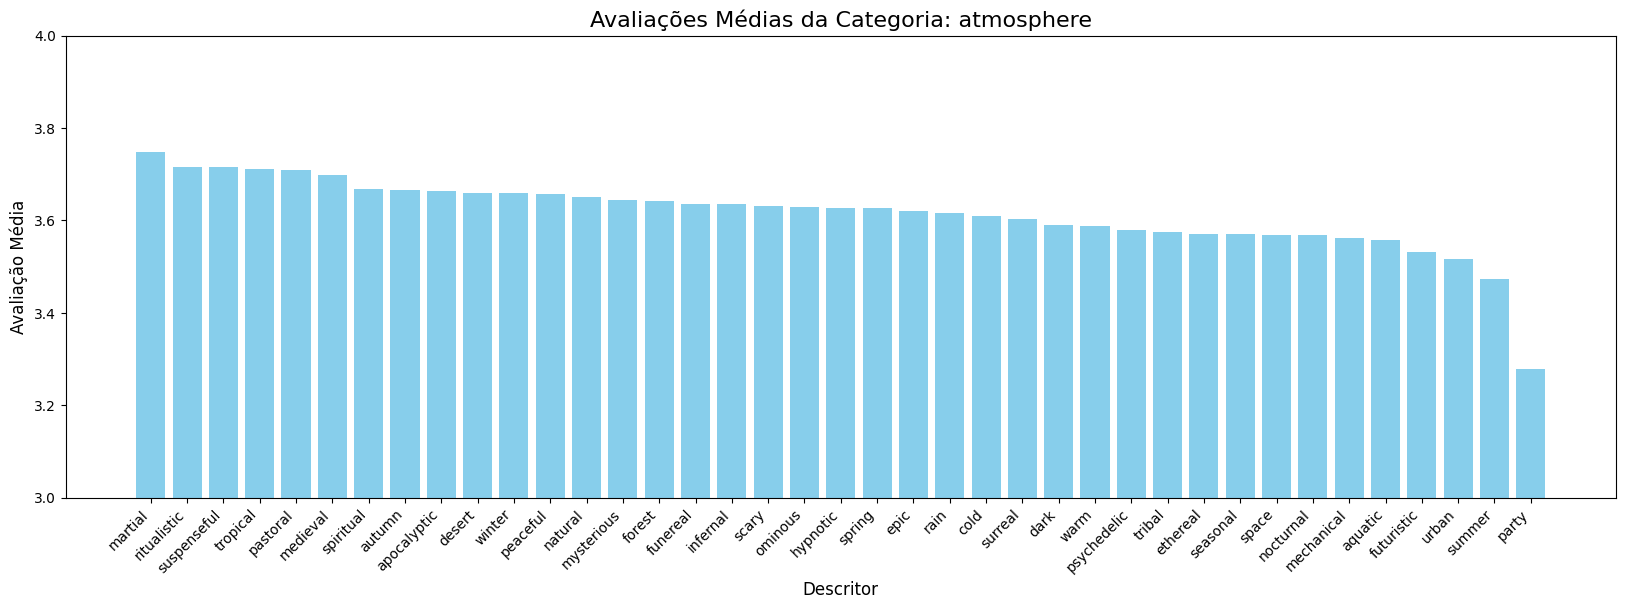

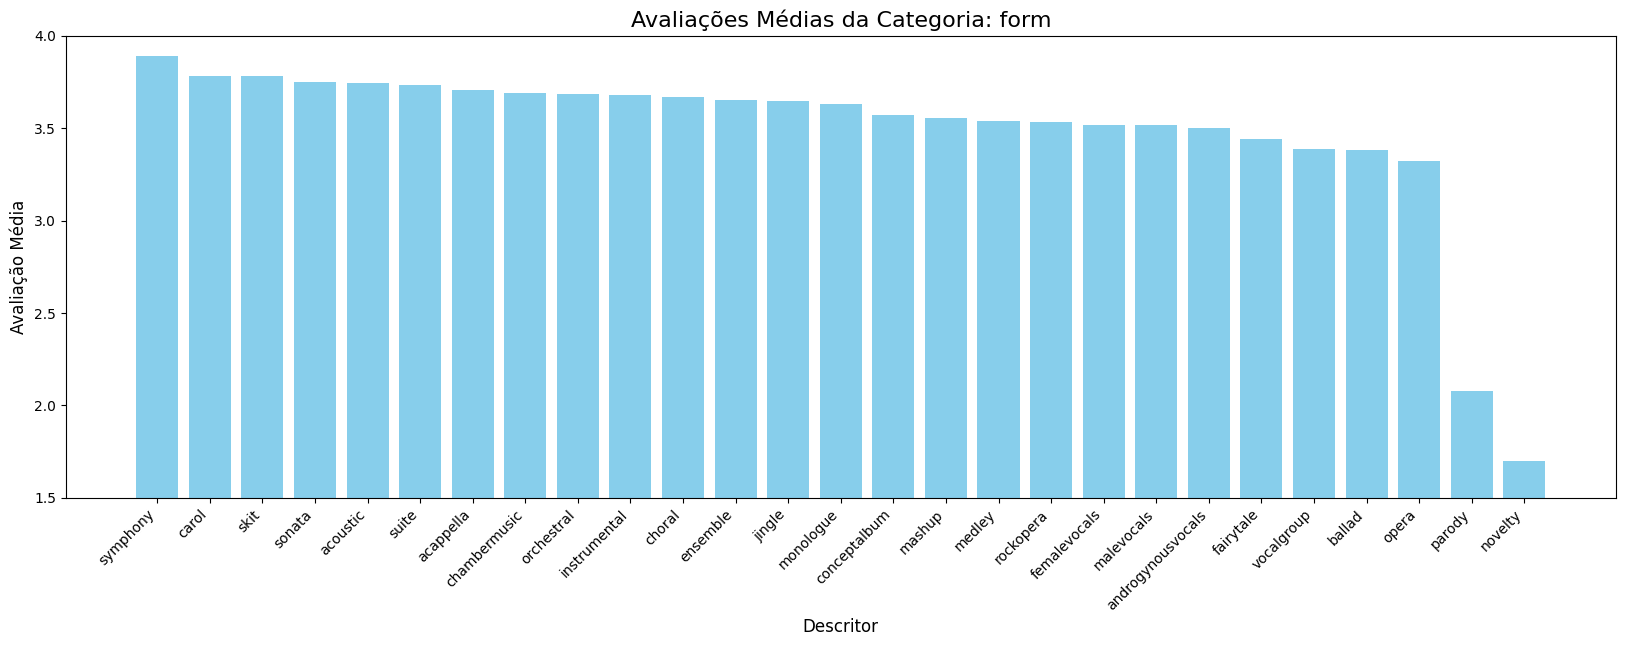

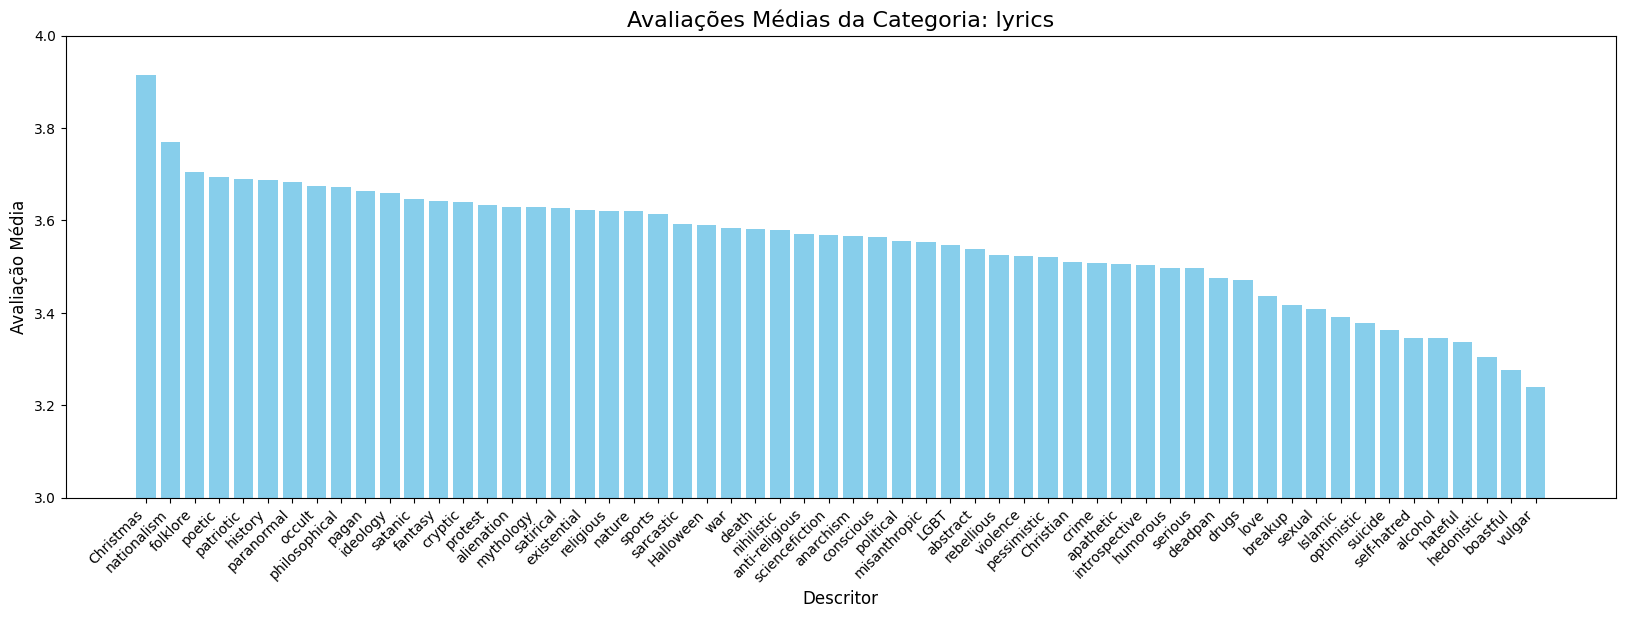

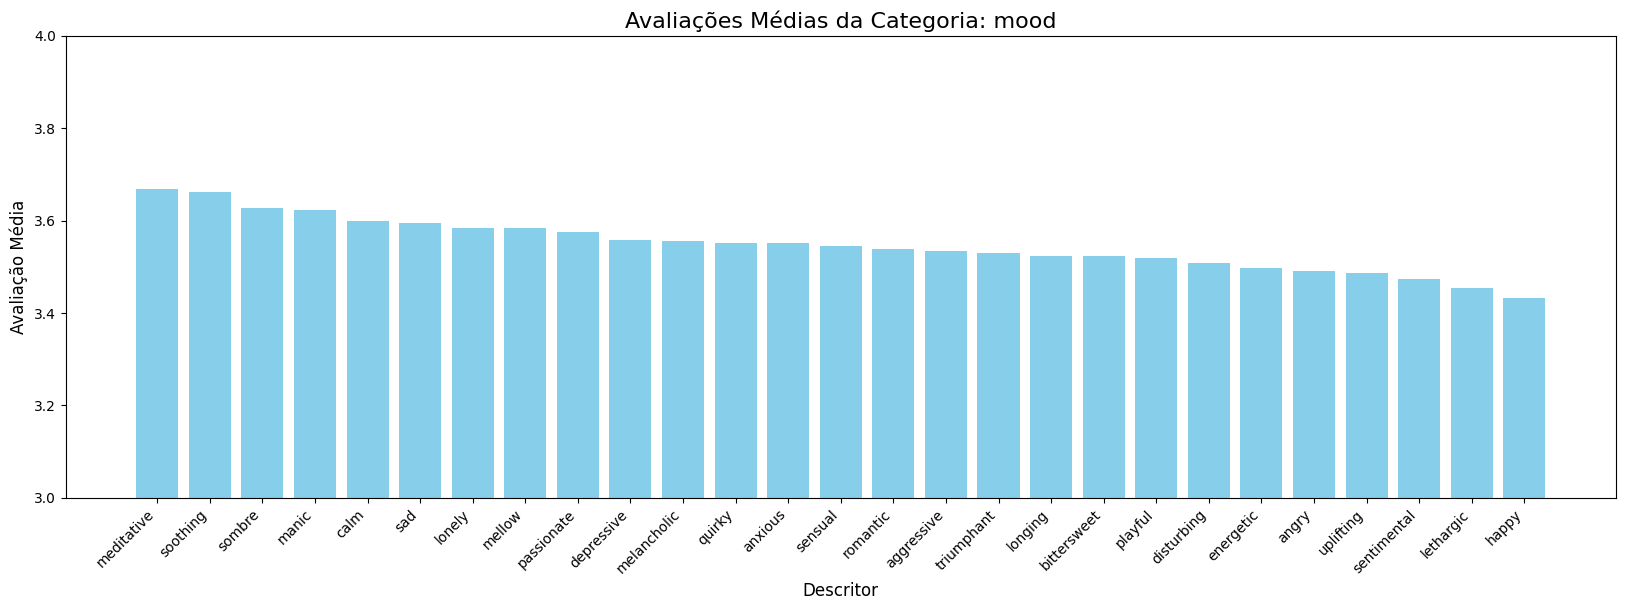

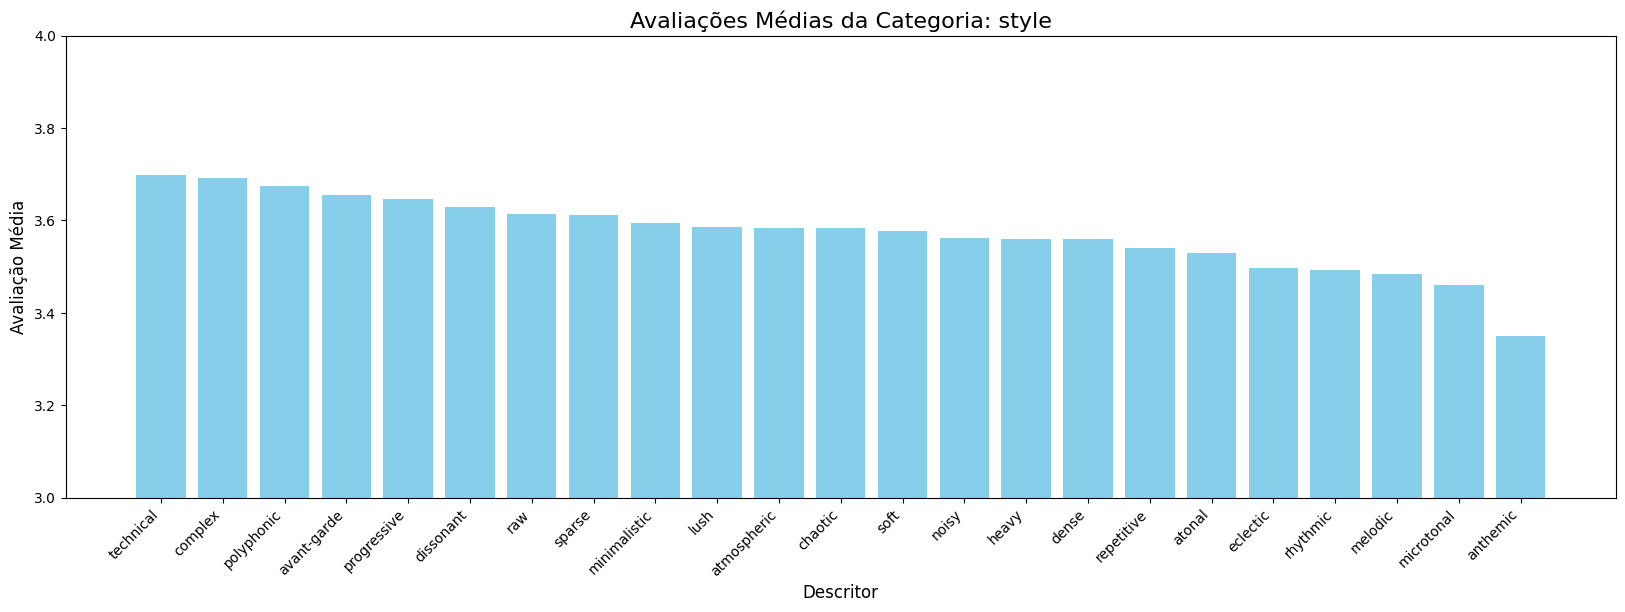

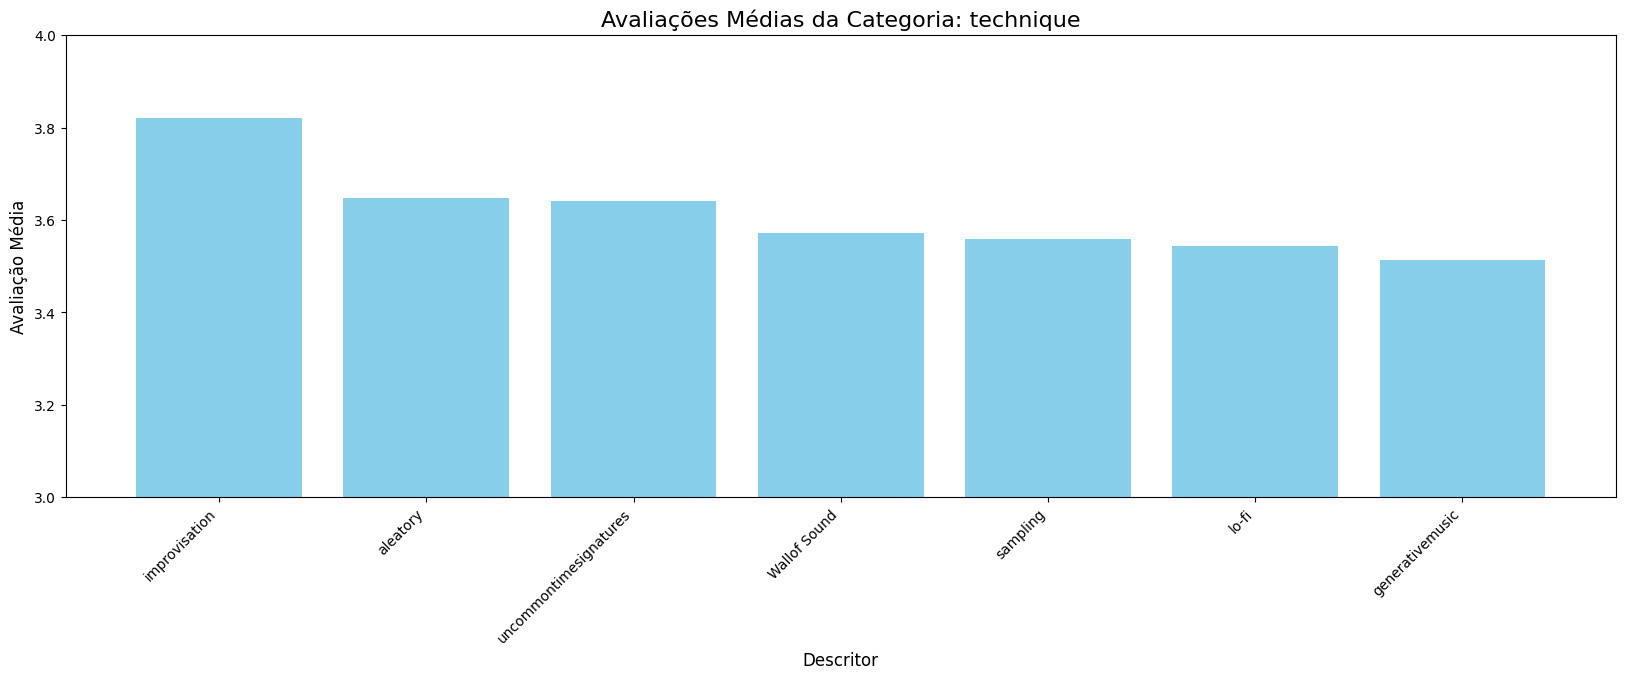

In [ ]:
sanitized_rym_df_copy = sanitized_rym_df[["avg_rating", "descriptors"]].copy()
sanitized_rym_df_copy["descriptors"] = sanitized_rym_df_copy["descriptors"].str.split(", ")
sanitized_rym_df_copy = sanitized_rym_df_copy.explode("descriptors")

average_ratings_by_descriptor_df = sanitized_rym_df_copy.groupby("descriptors")["avg_rating"].mean().reset_index()

for category, descriptors in categorized_descriptors.items():
    filtered_df = average_ratings_by_descriptor_df[average_ratings_by_descriptor_df["descriptors"].isin(descriptors)]
    filtered_df = filtered_df.sort_values(by="avg_rating", ascending=False)

    if category == "form":
        y_min = 1.5
        y_max = 4.0
    else:
        y_min = 3.0
        y_max = 4.0

    plt.figure(figsize=(20, 6))
    plt.bar(filtered_df["descriptors"], filtered_df["avg_rating"], color="skyblue")
    plt.xlabel("Descritor", fontsize=12)
    plt.ylabel("Avaliação Média", fontsize=12)
    plt.title(f"Avaliações Médias da Categoria: {category}", fontsize=16)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(y_min, y_max)
    plt.show()


Ao analisar os gráficos acima, nota-se que cada categoria de descritores possui um descritor dominante em 1º lugar.

Diante disso, torna-se relevante aprofundar a análise para verificar se algum desses descritores está, de fato, associado a avaliações médias mais altas em álbuns populares.

#### II. Análise dos Dados

Os testes de hipótese a seguir serão realizados de forma semelhante para cada descritor que ocupa a 1ª posição em sua categoria.

O objetivo é comparar a média de avaliações dos álbuns em geral com a média de avaliações dos álbuns que possuem o descritor em destaque.

##### Descritor: martial

**H0 (Hipótese Nula):** A média das avaliações dos álbuns com o descritor "martial" é menor ou igual à média geral das avaliações.

**H1 (Hipótese Alternativa):** A média das avaliações dos álbuns com o descritor "martial" é maior que a média geral das avaliações.

In [ ]:
descriptor_name = "martial"

# Média geral das avaliações, excluindo os álbuns com o descritor
mean_overall_no_descriptor = sanitized_rym_df[~sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating'].mean()

# Média geral das avaliações, incluindo os álbuns com o descritor
mean_overall_with_descriptor = sanitized_rym_df['avg_rating'].mean()

# Álbuns com o descritor
descriptor_ratings = sanitized_rym_df[sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating']

# Teste t para os álbuns com o descritor vs média geral sem o descritor (H1: média maior)
t_stat_no_descriptor, p_value_no_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_no_descriptor)
p_value_no_descriptor_unilateral = p_value_no_descriptor / 2 if t_stat_no_descriptor > 0 else 1.0

# Teste t para os álbuns com o descritor vs média geral com o descriptor (H1: média maior)
t_stat_with_descriptor, p_value_with_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_with_descriptor)
p_value_with_descriptor_unilateral = p_value_with_descriptor / 2 if t_stat_with_descriptor > 0 else 1.0

# Exibir resultados para análise sem o descritor
print(f'Análise com média geral sem os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_no_descriptor:.4f}, p-valor unilateral: {p_value_no_descriptor_unilateral:.4f}')
print(f'Média geral sem "{descriptor_name}": {mean_overall_no_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_no_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (sem "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (sem "{descriptor_name}").')

# Exibir resultados para análise com o descritor
print(f'\nAnálise com média geral incluindo os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_with_descriptor:.4f}, p-valor unilateral: {p_value_with_descriptor_unilateral:.4f}')
print(f'Média geral com "{descriptor_name}": {mean_overall_with_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_with_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (com "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (com "{descriptor_name}").')

Análise com média geral sem os álbuns "martial":
Estatística t: 3.6692, p-valor unilateral: 0.0026
Média geral sem "martial": 3.5400, Média "martial": 3.7470
Rejeitamos H0: A avaliação média de álbuns com "martial" é significativamente maior que a média geral (sem "martial").

Análise com média geral incluindo os álbuns "martial":
Estatística t: 3.6619, p-valor unilateral: 0.0026
Média geral com "martial": 3.5404, Média "martial": 3.7470
Rejeitamos H0: A avaliação média de álbuns com "martial" é significativamente maior que a média geral (com "martial").


In [ ]:
descriptor_name = "martial"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

descriptor_ratings = sanitized_rym_df[sanitized_rym_df["descriptors"].str.contains(descriptor_name, na=False)]["avg_rating"]

ic_95_bootstrap = bootstrap_confidence_interval(descriptor_ratings.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (3.6410000000000005, 3.853025)


##### Descritor: symphony

**H0 (Hipótese Nula):** A média das avaliações dos álbuns com o descritor "symphony" é menor ou igual à média geral das avaliações.

**H1 (Hipótese Alternativa):** A média das avaliações dos álbuns com o descritor "symphony" é maior que a média geral das avaliações.

In [ ]:
descriptor_name = "symphony"

# Média geral das avaliações, excluindo os álbuns com o descritor
mean_overall_no_descriptor = sanitized_rym_df[~sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating'].mean()

# Média geral das avaliações, incluindo os álbuns com o descritor
mean_overall_with_descriptor = sanitized_rym_df['avg_rating'].mean()

# Álbuns com o descritor
descriptor_ratings = sanitized_rym_df[sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating']

# Teste t para os álbuns com o descritor vs média geral sem o descritor (H1: média maior)
t_stat_no_descriptor, p_value_no_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_no_descriptor)
p_value_no_descriptor_unilateral = p_value_no_descriptor / 2 if t_stat_no_descriptor > 0 else 1.0

# Teste t para os álbuns com o descritor vs média geral com o descriptor (H1: média maior)
t_stat_with_descriptor, p_value_with_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_with_descriptor)
p_value_with_descriptor_unilateral = p_value_with_descriptor / 2 if t_stat_with_descriptor > 0 else 1.0

# Exibir resultados para análise sem o descritor
print(f'Análise com média geral sem os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_no_descriptor:.4f}, p-valor unilateral: {p_value_no_descriptor_unilateral:.4f}')
print(f'Média geral sem "{descriptor_name}": {mean_overall_no_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_no_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (sem "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (sem "{descriptor_name}").')

# Exibir resultados para análise com o descritor
print(f'\nAnálise com média geral incluindo os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_with_descriptor:.4f}, p-valor unilateral: {p_value_with_descriptor_unilateral:.4f}')
print(f'Média geral com "{descriptor_name}": {mean_overall_with_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_with_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (com "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (com "{descriptor_name}").')

Análise com média geral sem os álbuns "symphony":
Estatística t: nan, p-valor unilateral: 1.0000
Média geral sem "symphony": 3.5404, Média "symphony": 3.8900
Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "symphony" seja maior que a média geral (sem "symphony").

Análise com média geral incluindo os álbuns "symphony":
Estatística t: nan, p-valor unilateral: 1.0000
Média geral com "symphony": 3.5404, Média "symphony": 3.8900
Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "symphony" seja maior que a média geral (com "symphony").


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [ ]:
descriptor_name = "symphony"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

descriptor_ratings = sanitized_rym_df[sanitized_rym_df["descriptors"].str.contains(descriptor_name, na=False)]["avg_rating"]

ic_95_bootstrap = bootstrap_confidence_interval(descriptor_ratings.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (3.89, 3.89)


##### Descritor: Christmas

**H0 (Hipótese Nula):** A média das avaliações dos álbuns com o descritor "Christmas" é menor ou igual à média geral das avaliações.

**H1 (Hipótese Alternativa):** A média das avaliações dos álbuns com o descritor "Christmas" é maior que a média geral das avaliações.

In [ ]:
descriptor_name = "Christmas"

# Média geral das avaliações, excluindo os álbuns com o descritor
mean_overall_no_descriptor = sanitized_rym_df[~sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating'].mean()

# Média geral das avaliações, incluindo os álbuns com o descritor
mean_overall_with_descriptor = sanitized_rym_df['avg_rating'].mean()

# Álbuns com o descritor
descriptor_ratings = sanitized_rym_df[sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating']

# Teste t para os álbuns com o descritor vs média geral sem o descritor (H1: média maior)
t_stat_no_descriptor, p_value_no_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_no_descriptor)
p_value_no_descriptor_unilateral = p_value_no_descriptor / 2 if t_stat_no_descriptor > 0 else 1.0

# Teste t para os álbuns com o descritor vs média geral com o descriptor (H1: média maior)
t_stat_with_descriptor, p_value_with_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_with_descriptor)
p_value_with_descriptor_unilateral = p_value_with_descriptor / 2 if t_stat_with_descriptor > 0 else 1.0

# Exibir resultados para análise sem o descritor
print(f'Análise com média geral sem os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_no_descriptor:.4f}, p-valor unilateral: {p_value_no_descriptor_unilateral:.4f}')
print(f'Média geral sem "{descriptor_name}": {mean_overall_no_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_no_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (sem "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (sem "{descriptor_name}").')

# Exibir resultados para análise com o descritor
print(f'\nAnálise com média geral incluindo os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_with_descriptor:.4f}, p-valor unilateral: {p_value_with_descriptor_unilateral:.4f}')
print(f'Média geral com "{descriptor_name}": {mean_overall_with_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_with_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (com "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (com "{descriptor_name}").')

Análise com média geral sem os álbuns "Christmas":
Estatística t: 2.7757, p-valor unilateral: 0.1101
Média geral sem "Christmas": 3.5403, Média "Christmas": 3.9150
Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "Christmas" seja maior que a média geral (sem "Christmas").

Análise com média geral incluindo os álbuns "Christmas":
Estatística t: 2.7746, p-valor unilateral: 0.1101
Média geral com "Christmas": 3.5404, Média "Christmas": 3.9150
Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "Christmas" seja maior que a média geral (com "Christmas").


In [ ]:
descriptor_name = "Christmas"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

descriptor_ratings = sanitized_rym_df[sanitized_rym_df["descriptors"].str.contains(descriptor_name, na=False)]["avg_rating"]

ic_95_bootstrap = bootstrap_confidence_interval(descriptor_ratings.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (3.78, 4.05)


##### Descritor: meditative

**H0 (Hipótese Nula):** A média das avaliações dos álbuns com o descritor "meditative" é menor ou igual à média geral das avaliações.

**H1 (Hipótese Alternativa):** A média das avaliações dos álbuns com o descritor "meditative" é maior que a média geral das avaliações.

In [ ]:
descriptor_name = "meditative"

# Média geral das avaliações, excluindo os álbuns com o descritor
mean_overall_no_descriptor = sanitized_rym_df[~sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating'].mean()

# Média geral das avaliações, incluindo os álbuns com o descritor
mean_overall_with_descriptor = sanitized_rym_df['avg_rating'].mean()

# Álbuns com o descritor
descriptor_ratings = sanitized_rym_df[sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating']

# Teste t para os álbuns com o descritor vs média geral sem o descritor (H1: média maior)
t_stat_no_descriptor, p_value_no_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_no_descriptor)
p_value_no_descriptor_unilateral = p_value_no_descriptor / 2 if t_stat_no_descriptor > 0 else 1.0

# Teste t para os álbuns com o descritor vs média geral com o descriptor (H1: média maior)
t_stat_with_descriptor, p_value_with_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_with_descriptor)
p_value_with_descriptor_unilateral = p_value_with_descriptor / 2 if t_stat_with_descriptor > 0 else 1.0

# Exibir resultados para análise sem o descritor
print(f'Análise com média geral sem os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_no_descriptor:.4f}, p-valor unilateral: {p_value_no_descriptor_unilateral:.4f}')
print(f'Média geral sem "{descriptor_name}": {mean_overall_no_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_no_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (sem "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (sem "{descriptor_name}").')

# Exibir resultados para análise com o descritor
print(f'\nAnálise com média geral incluindo os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_with_descriptor:.4f}, p-valor unilateral: {p_value_with_descriptor_unilateral:.4f}')
print(f'Média geral com "{descriptor_name}": {mean_overall_with_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_with_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (com "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (com "{descriptor_name}").')

Análise com média geral sem os álbuns "meditative":
Estatística t: 5.8264, p-valor unilateral: 0.0000
Média geral sem "meditative": 3.5375, Média "meditative": 3.6688
Rejeitamos H0: A avaliação média de álbuns com "meditative" é significativamente maior que a média geral (sem "meditative").

Análise com média geral incluindo os álbuns "meditative":
Estatística t: 5.6948, p-valor unilateral: 0.0000
Média geral com "meditative": 3.5404, Média "meditative": 3.6688
Rejeitamos H0: A avaliação média de álbuns com "meditative" é significativamente maior que a média geral (com "meditative").


In [ ]:
descriptor_name = "meditative"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

descriptor_ratings = sanitized_rym_df[sanitized_rym_df["descriptors"].str.contains(descriptor_name, na=False)]["avg_rating"]

ic_95_bootstrap = bootstrap_confidence_interval(descriptor_ratings.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (3.6230951327433627, 3.712300884955752)


##### Descritor: technical

**H0 (Hipótese Nula):** A média das avaliações dos álbuns com o descritor "technical" é menor ou igual à média geral das avaliações.

**H1 (Hipótese Alternativa):** A média das avaliações dos álbuns com o descritor "technical" é maior que a média geral das avaliações.

In [ ]:
descriptor_name = "technical"

# Média geral das avaliações, excluindo os álbuns com o descritor
mean_overall_no_descriptor = sanitized_rym_df[~sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating'].mean()

# Média geral das avaliações, incluindo os álbuns com o descritor
mean_overall_with_descriptor = sanitized_rym_df['avg_rating'].mean()

# Álbuns com o descritor
descriptor_ratings = sanitized_rym_df[sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating']

# Teste t para os álbuns com o descritor vs média geral sem o descritor (H1: média maior)
t_stat_no_descriptor, p_value_no_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_no_descriptor)
p_value_no_descriptor_unilateral = p_value_no_descriptor / 2 if t_stat_no_descriptor > 0 else 1.0

# Teste t para os álbuns com o descritor vs média geral com o descriptor (H1: média maior)
t_stat_with_descriptor, p_value_with_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_with_descriptor)
p_value_with_descriptor_unilateral = p_value_with_descriptor / 2 if t_stat_with_descriptor > 0 else 1.0

# Exibir resultados para análise sem o descritor
print(f'Análise com média geral sem os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_no_descriptor:.4f}, p-valor unilateral: {p_value_no_descriptor_unilateral:.4f}')
print(f'Média geral sem "{descriptor_name}": {mean_overall_no_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_no_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (sem "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (sem "{descriptor_name}").')

# Exibir resultados para análise com o descritor
print(f'\nAnálise com média geral incluindo os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_with_descriptor:.4f}, p-valor unilateral: {p_value_with_descriptor_unilateral:.4f}')
print(f'Média geral com "{descriptor_name}": {mean_overall_with_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_with_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (com "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (com "{descriptor_name}").')

Análise com média geral sem os álbuns "technical":
Estatística t: 13.3395, p-valor unilateral: 0.0000
Média geral sem "technical": 3.5299, Média "technical": 3.6977
Rejeitamos H0: A avaliação média de álbuns com "technical" é significativamente maior que a média geral (sem "technical").

Análise com média geral incluindo os álbuns "technical":
Estatística t: 12.5045, p-valor unilateral: 0.0000
Média geral com "technical": 3.5404, Média "technical": 3.6977
Rejeitamos H0: A avaliação média de álbuns com "technical" é significativamente maior que a média geral (com "technical").


In [ ]:
descriptor_name = "technical"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

descriptor_ratings = sanitized_rym_df[sanitized_rym_df["descriptors"].str.contains(descriptor_name, na=False)]["avg_rating"]

ic_95_bootstrap = bootstrap_confidence_interval(descriptor_ratings.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (3.6729376996805114, 3.72185303514377)


##### Descritor: improvisation

**H0 (Hipótese Nula):** A média das avaliações dos álbuns com o descritor "improvisation" é menor ou igual à média geral das avaliações.

**H1 (Hipótese Alternativa):** A média das avaliações dos álbuns com o descritor "improvisation" é maior que a média geral das avaliações.

In [ ]:
descriptor_name = "improvisation"

# Média geral das avaliações, excluindo os álbuns com o descritor
mean_overall_no_descriptor = sanitized_rym_df[~sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating'].mean()

# Média geral das avaliações, incluindo os álbuns com o descritor
mean_overall_with_descriptor = sanitized_rym_df['avg_rating'].mean()

# Álbuns com o descritor
descriptor_ratings = sanitized_rym_df[sanitized_rym_df['descriptors'].str.contains(descriptor_name, na=False)]['avg_rating']

# Teste t para os álbuns com o descritor vs média geral sem o descritor (H1: média maior)
t_stat_no_descriptor, p_value_no_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_no_descriptor)
p_value_no_descriptor_unilateral = p_value_no_descriptor / 2 if t_stat_no_descriptor > 0 else 1.0

# Teste t para os álbuns com o descritor vs média geral com o descriptor (H1: média maior)
t_stat_with_descriptor, p_value_with_descriptor = stats.ttest_1samp(descriptor_ratings, mean_overall_with_descriptor)
p_value_with_descriptor_unilateral = p_value_with_descriptor / 2 if t_stat_with_descriptor > 0 else 1.0

# Exibir resultados para análise sem o descritor
print(f'Análise com média geral sem os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_no_descriptor:.4f}, p-valor unilateral: {p_value_no_descriptor_unilateral:.4f}')
print(f'Média geral sem "{descriptor_name}": {mean_overall_no_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_no_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (sem "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (sem "{descriptor_name}").')

# Exibir resultados para análise com o descritor
print(f'\nAnálise com média geral incluindo os álbuns "{descriptor_name}":')
print(f'Estatística t: {t_stat_with_descriptor:.4f}, p-valor unilateral: {p_value_with_descriptor_unilateral:.4f}')
print(f'Média geral com "{descriptor_name}": {mean_overall_with_descriptor:.4f}, Média "{descriptor_name}": {descriptor_ratings.mean():.4f}')

if p_value_with_descriptor_unilateral < 0.05:
    print(f'Rejeitamos H0: A avaliação média de álbuns com "{descriptor_name}" é significativamente maior que a média geral (com "{descriptor_name}").')
else:
    print(f'Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "{descriptor_name}" seja maior que a média geral (com "{descriptor_name}").')

Análise com média geral sem os álbuns "improvisation":
Estatística t: 15.5850, p-valor unilateral: 0.0000
Média geral sem "improvisation": 3.5330, Média "improvisation": 3.8217
Rejeitamos H0: A avaliação média de álbuns com "improvisation" é significativamente maior que a média geral (sem "improvisation").

Análise com média geral incluindo os álbuns "improvisation":
Estatística t: 15.1829, p-valor unilateral: 0.0000
Média geral com "improvisation": 3.5404, Média "improvisation": 3.8217
Rejeitamos H0: A avaliação média de álbuns com "improvisation" é significativamente maior que a média geral (com "improvisation").


In [ ]:
descriptor_name = "improvisation"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

descriptor_ratings = sanitized_rym_df[sanitized_rym_df["descriptors"].str.contains(descriptor_name, na=False)]["avg_rating"]

ic_95_bootstrap = bootstrap_confidence_interval(descriptor_ratings.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (3.7851143410852712, 3.855893410852713)


#### III. Modelagem Preditiva

##### Descritores x Avaliação Média

Preparação dos Dados

In [ ]:
sanitized_rym_df_copy = sanitized_rym_df[["release_name", "avg_rating", "descriptors"]].copy()
sanitized_rym_df_copy["descriptors"] = sanitized_rym_df_copy["descriptors"].str.split(", ")
sanitized_rym_df_copy = sanitized_rym_df_copy.explode("descriptors")

one_hot_encoded_descriptors = pd.get_dummies(sanitized_rym_df_copy["descriptors"])

sanitized_rym_df_with_encoding = pd.concat([sanitized_rym_df_copy, one_hot_encoded_descriptors], axis=1)

sanitized_rym_df_with_encoding = sanitized_rym_df_with_encoding.groupby("release_name").agg({
    **{col: "sum" for col in one_hot_encoded_descriptors.columns},
    "avg_rating": "first"
}).reset_index()

sanitized_rym_df_with_encoding.head()

,release_name,Christian,Christmas,Halloween,Islamic,LGBT,Wallof Sound,abstract,acappella,acoustic,...,uncommontimesignatures,uplifting,urban,violence,vocalgroup,vulgar,war,warm,winter,avg_rating
0,"""Awaken, My Love!""",0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,3.49
1,"""Born Into Trouble as the Sparks Fly Upward.""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3.65
2,"""Charlie""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.64
3,"""Disco!""",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.51
4,"""Heroes""",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3.98


Estruturação dos Dados de Treino/Teste

In [ ]:
X = sanitized_rym_df_with_encoding.drop(columns=["release_name", "avg_rating"])
y = sanitized_rym_df_with_encoding["avg_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Modelo de Regressão Linear

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_test, y_pred)}")

Erro Quadrático Médio (MSE): 0.10873976633390384
Erro Médio Absoluto (MAE): 0.23312539546340905
Coeficiente de Determinação (R²): 0.246194519906753


Modelo de Random Forest

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_test, y_pred)}")

Erro Quadrático Médio (MSE): 0.10219081762097686
Erro Médio Absoluto (MAE): 0.227799675149412
Coeficiente de Determinação (R²): 0.29159312241519686


Previsão

In [ ]:
predicted_album_descriptors = ["humorous", "sampling", "conscious", "playful", "malevocals", "passionate", "boastful", "satirical", "sarcastic", "warm"]

predicted_album_vector = {col: 0 for col in X.columns}
for descriptor in predicted_album_descriptors:
  if descriptor in predicted_album_vector:
    predicted_album_vector[descriptor] = 1

predicted_album_df = pd.DataFrame([predicted_album_vector])

predicted_album_avg_rating = model.predict(predicted_album_df)
predicted_album_descriptors_string = ", ".join(predicted_album_descriptors)

print(f"O modelo prevê que o album com os descritores fornecidos terá uma avaliação média de: {predicted_album_avg_rating[0]:.2f}")

O modelo prevê que o album com os descritores fornecidos terá uma avaliação média de: 3.93


### Pergunta 2: As características sonoras predominantes dos álbuns populares diferem entre algumas regiões?

#### I. Visualização dos Dados

A proposta aqui é explorar a distribuição das características sonoras dos álbuns populares conforme suas regiões de origem.

Essa análise é realizada tanto por meio da visualização dos descritores predominantes em cada região quanto pela quantificação das regiões que possuem uma determinada categoria de descritores.

In [ ]:
rym_raw_df = pd.read_csv(RYM_CSV_DATASET_PATH)

most_popular_albuns_df = rym_raw_df.merge(
  sanitized_merged_rym_discogs_df,
  left_on=["release_name", "artist_name"],
  right_on=["album_name", "artist_name"],
  how="inner"
)

most_popular_country_descriptors_df = most_popular_albuns_df[["source_countries", "descriptors"]].explode("source_countries")
most_popular_country_descriptors_df["source_countries"] = most_popular_country_descriptors_df["source_countries"].str.split(", ")
most_popular_country_descriptors_df = most_popular_country_descriptors_df.explode("source_countries").dropna()
most_popular_country_descriptors_df["region"] = most_popular_country_descriptors_df["source_countries"].apply(country_to_region)
most_popular_country_descriptors_df.rename(columns={"source_countries": "country"}, inplace=True)

most_popular_country_descriptors_df["descriptors"] = most_popular_country_descriptors_df["descriptors"].str.split(",")
most_popular_country_descriptors_df = most_popular_country_descriptors_df.explode("descriptors")
most_popular_country_descriptors_df.rename(columns={"descriptors": "descriptor"}, inplace=True)

wrong_countries = ["Australasia", "Turkey", "Worldwide", "Gulf Cooperation Council", "Middle East", "USSR", "Republic of", "CIS", "Europe", "Asia", "South America", "Cyprus"]
most_popular_country_descriptors_df = most_popular_country_descriptors_df[~most_popular_country_descriptors_df["country"].isin(wrong_countries)]

In [ ]:
for category, descriptors in categorized_descriptors.items():
  grouped_most_popular_region_descriptors_df = most_popular_country_descriptors_df[most_popular_country_descriptors_df["descriptor"].isin(descriptors)]

  grouped_most_popular_region_descriptors_df = grouped_most_popular_region_descriptors_df.groupby(["region", "descriptor"]).size().reset_index(name="count")
  grouped_most_popular_region_descriptors_df = grouped_most_popular_region_descriptors_df.sort_values(["region", "count"], ascending=[True, False])
  grouped_most_popular_region_descriptors_df = grouped_most_popular_region_descriptors_df.groupby("region").head(3).reset_index(drop=True)
  grouped_most_popular_region_descriptors_df = grouped_most_popular_region_descriptors_df.groupby("region")["descriptor"].agg(list).reset_index()

  print(f'\nTop Descritores Regionais da Categoria: {category}')
  print(grouped_most_popular_region_descriptors_df.head(len(region_mapping)))


Top Descritores Regionais da Categoria: atmosphere
                region                     descriptor
0      América Central      [psychedelic, epic, dark]
1     América do Norte     [psychedelic, urban, dark]
2       América do Sul      [dark, psychedelic, warm]
3               Caribe  [psychedelic, epic, pastoral]
4     Europa Ocidental     [psychedelic, dark, urban]
5      Europa Oriental             [dark, epic, cold]
6              Oceania     [psychedelic, urban, dark]
7        Oriente Médio     [psychedelic, epic, urban]
8    Península Arábica            [dark, urban, epic]
9     Sudeste Asiático      [dark, psychedelic, cold]
10  África Subsaariana      [psychedelic, dark, warm]
11     África do Norte              [nocturnal, epic]
12       Ásia Oriental     [psychedelic, dark, urban]
13         Ásia do Sul      [dark, psychedelic, epic]

Top Descritores Regionais da Categoria: form
                region                                descriptor
0      América Central  [ma

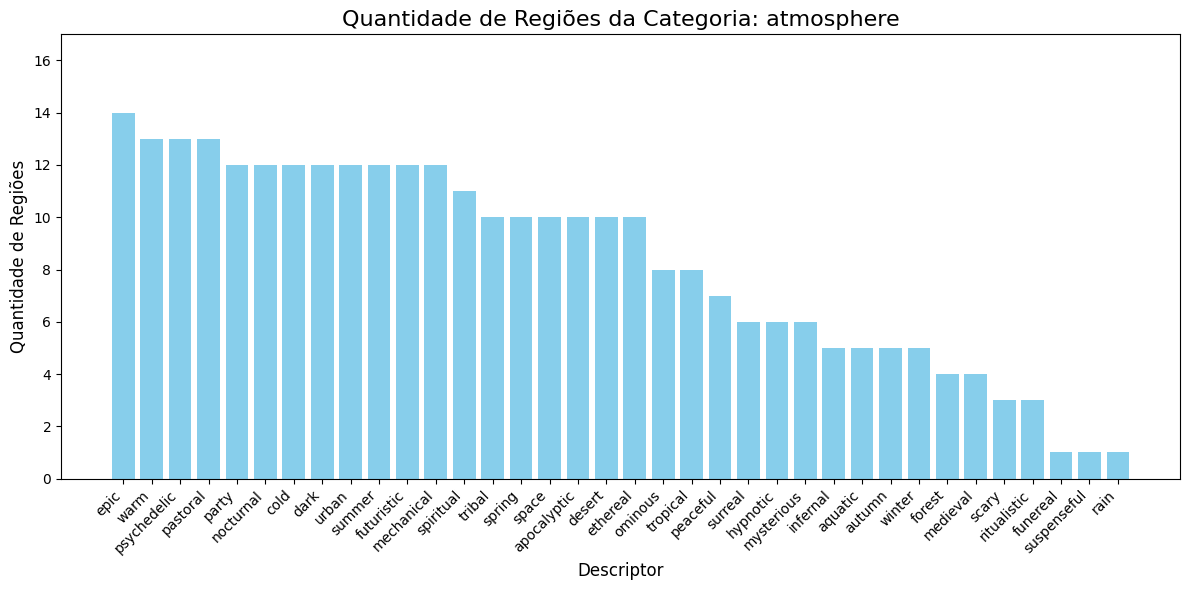

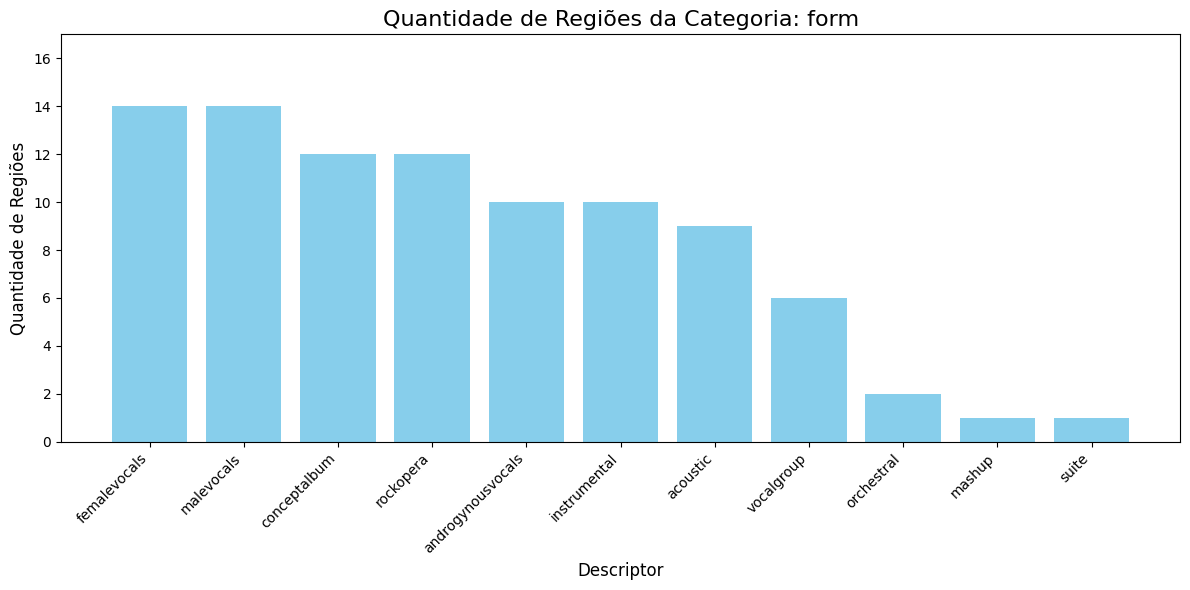

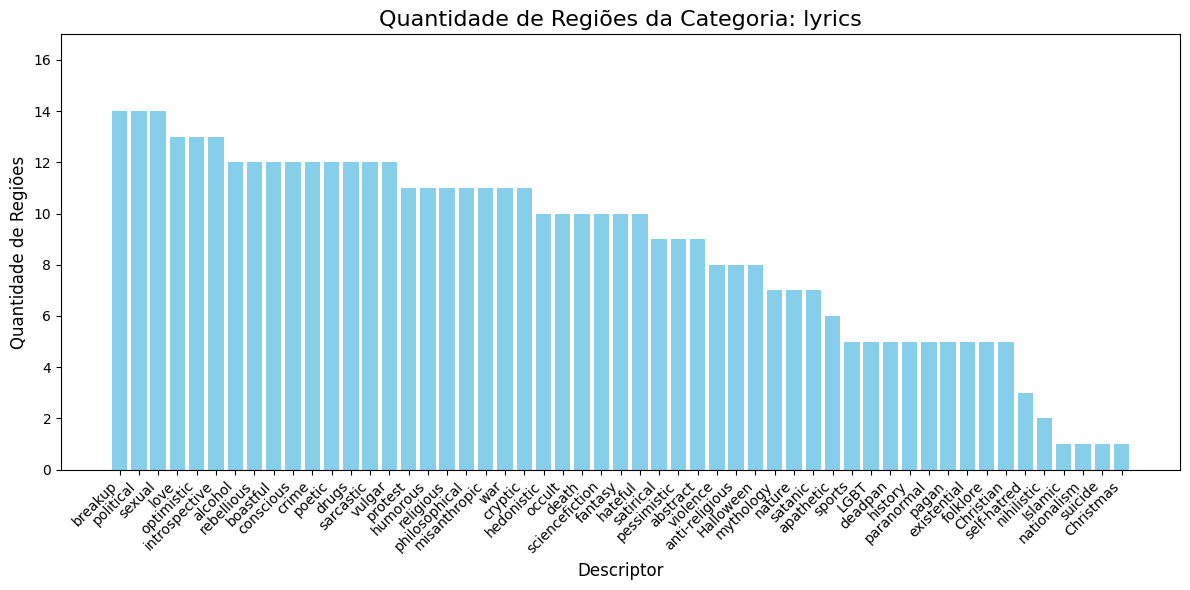

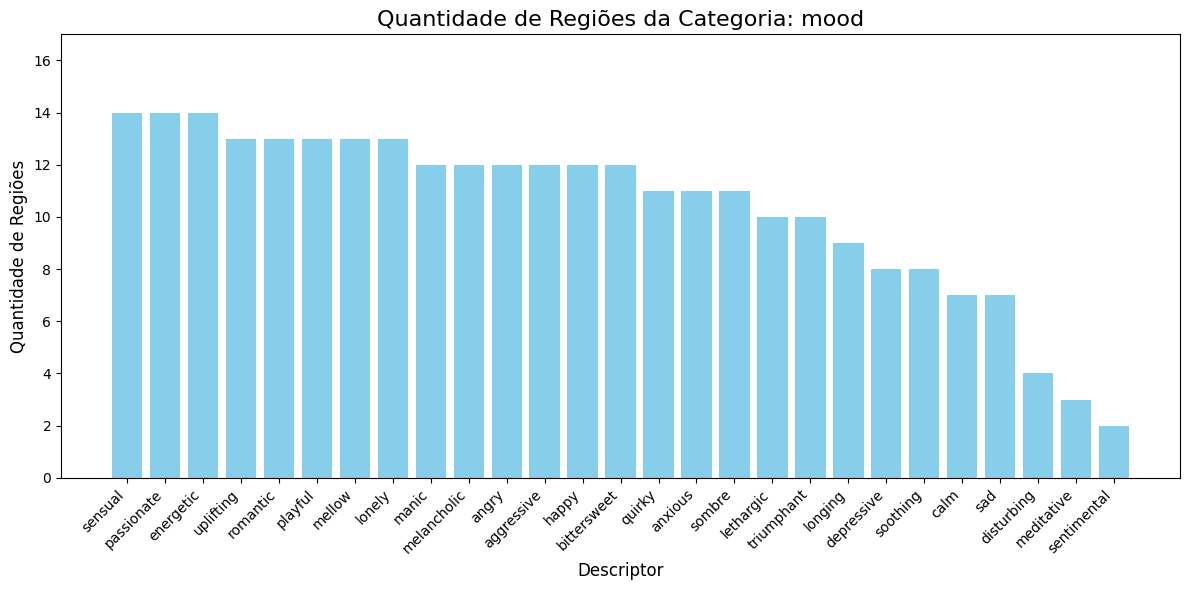

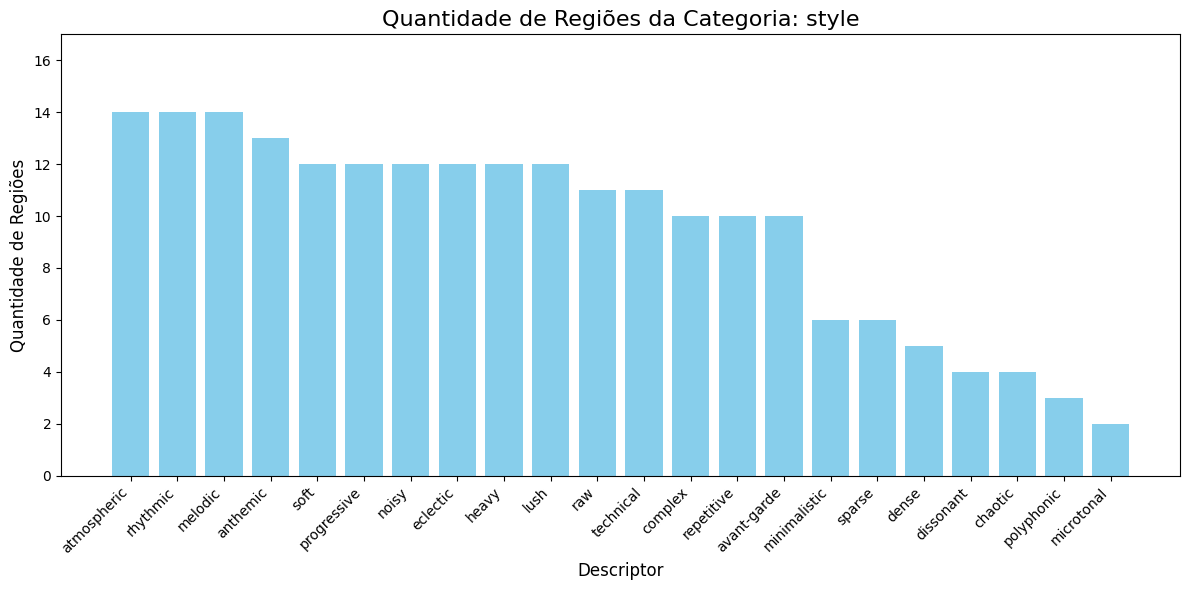

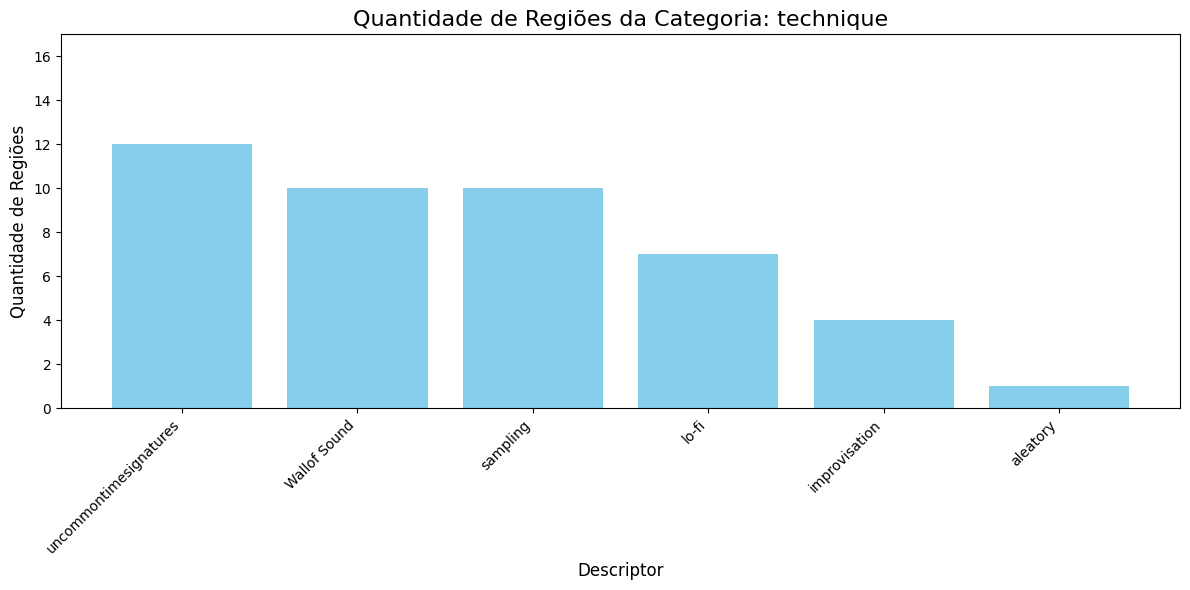

In [ ]:
for category, descriptors in categorized_descriptors.items():
  descriptor_region_count_df = most_popular_country_descriptors_df[most_popular_country_descriptors_df["descriptor"].isin(descriptors)]
  descriptor_region_count_df = descriptor_region_count_df.groupby("descriptor")["region"].nunique().reset_index()
  descriptor_region_count_df.rename(columns={"region": "region_count"}, inplace=True)
  descriptor_region_count_df = descriptor_region_count_df.sort_values(by="region_count", ascending=False)

  plt.figure(figsize=(12, 6))
  plt.bar(descriptor_region_count_df["descriptor"], descriptor_region_count_df["region_count"], color="skyblue")
  plt.xlabel("Descriptor", fontsize=12)
  plt.ylabel("Quantidade de Regiões", fontsize=12)
  plt.title(f"Quantidade de Regiões da Categoria: {category}", fontsize=16)
  plt.xticks(rotation=45, ha="right")
  plt.tight_layout()
  plt.ylim(0, len(region_mapping))
  plt.show()

### Pergunta 3: Músicas de certos gêneros são mais populares do que outras?

#### I. Visualização dos Dados

A proposta aqui é analisar a distribuição dos gêneros musicais com base nas músicas mais populares, considerando tanto a popularidade média quanto o recorte das faixas mais populares.

In [ ]:
spotify_raw_df = pd.read_csv(SPOTIFY_CSV_DATASET_PATH)

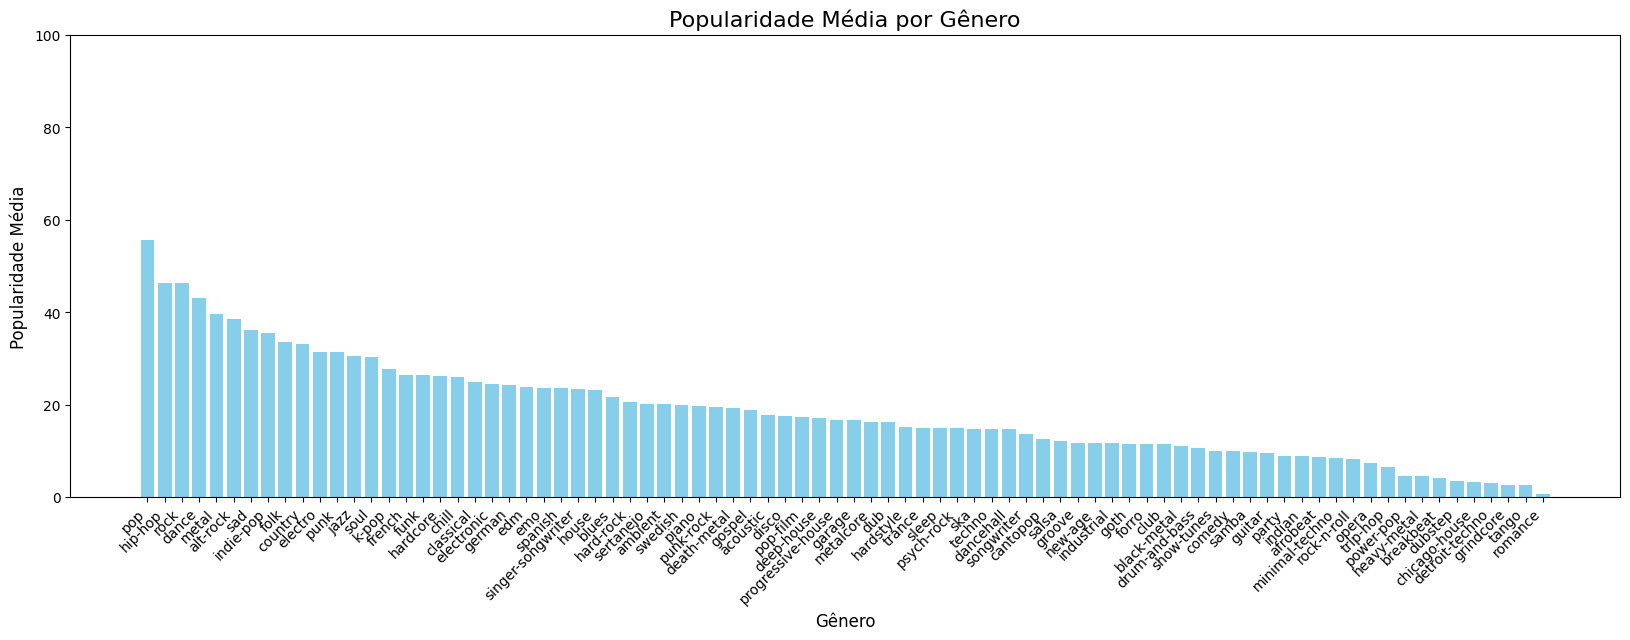

In [ ]:
spotify_df = spotify_raw_df.copy()
spotify_df = spotify_df[['genre', 'popularity']].dropna()

average_popularity_by_genre_df = spotify_df.groupby("genre")["popularity"].mean().reset_index()
average_popularity_by_genre_df = average_popularity_by_genre_df.sort_values(by="popularity", ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(average_popularity_by_genre_df["genre"], average_popularity_by_genre_df["popularity"], color="skyblue")
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Popularidade Média", fontsize=12)
plt.title("Popularidade Média por Gênero", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.show()

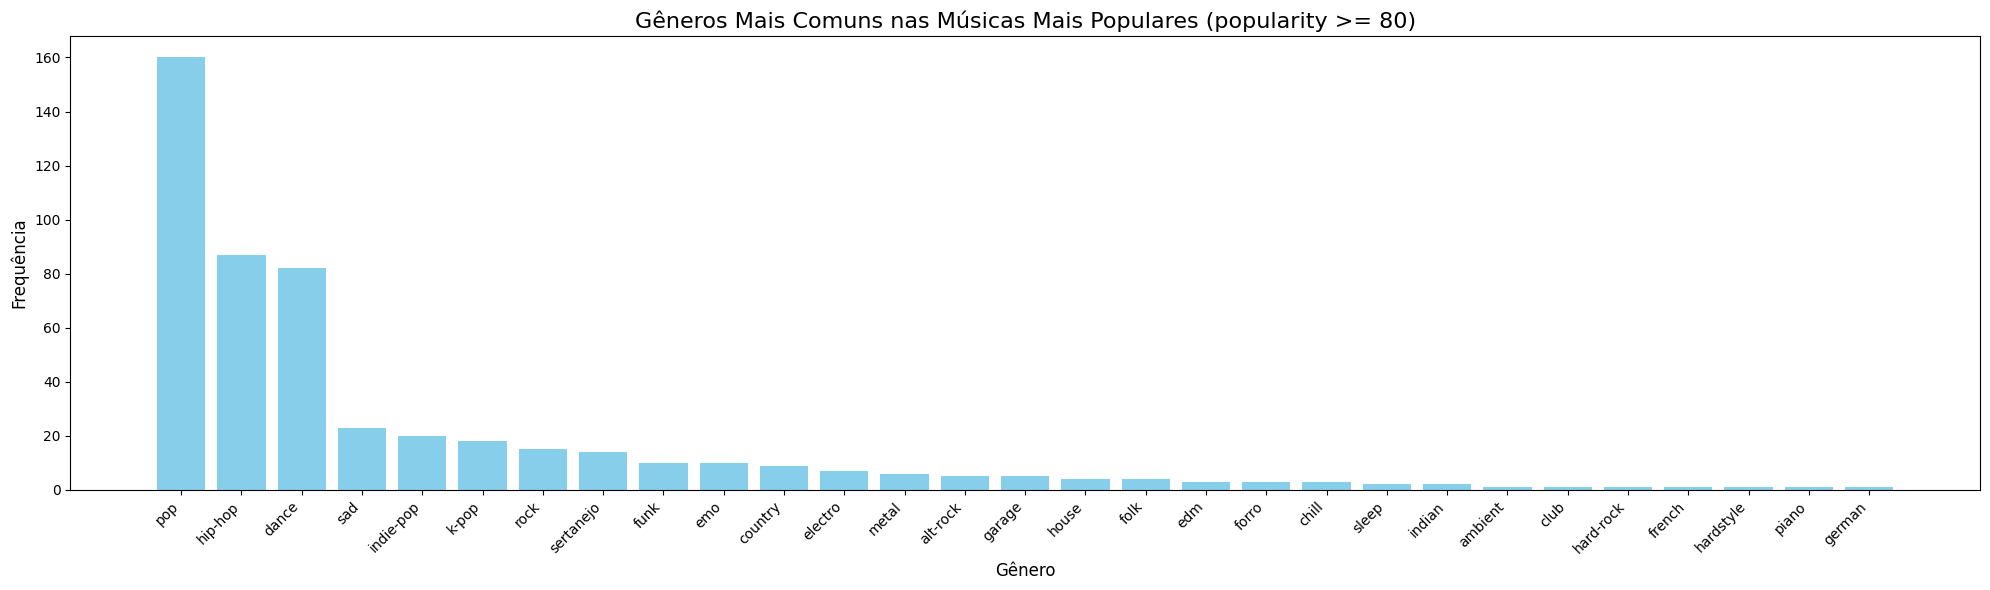

In [ ]:
most_popular_songs_df = spotify_df[spotify_df["popularity"] >= 80]

genre_counts = most_popular_songs_df["genre"].value_counts()

plt.figure(figsize=(20, 6))
plt.bar(genre_counts.index, genre_counts.values, color="skyblue")
plt.xlabel("Gênero", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Gêneros Mais Comuns nas Músicas Mais Populares (popularity >= 80)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Ao analisar os gráficos acima, é possível observar que certos gêneros musicais parecem ser mais comuns que outros, quando relacionados à popularidade da música.

Diante disso, torna-se relevante aprofundar a análise para verificar se algum desses gêneros está, de fato, associado a popularidades mais altas nas músicas.

#### II. Análise dos Dados

Os testes de hipótese a seguir serão realizados de forma semelhante para cada gênero que aparenta ter relação com a popularidade da música.

O objetivo é comparar a média de popularidade das músicas em geral com a média de popularidade das músicas que possuem o gênero em destaque.

##### Gênero: pop

**H0 (Hipótese Nula):** A média das popularidades das músicas com o gênero "pop" é menor ou igual à média geral das popularidades.

**H1 (Hipótese Alternativa):** A média das popularidades das músicas com o gênero "pop" é maior que a média geral das popularidades.

In [ ]:
genre_name = "pop"

mean_overall = spotify_df["popularity"].mean()

genre_popularity = spotify_df[spotify_df["genre"] == genre_name]["popularity"]

# Alteração no teste para um teste unilateral (maior que)
t_stat, p_value = stats.ttest_1samp(genre_popularity, mean_overall, alternative='greater')

print(f"Estatística t: {t_stat:.4f}, p-valor unilateral: {p_value:.4f}")
print(f"Média geral: {mean_overall:.4f}, Média '{genre_name}': {genre_popularity.mean():.4f}")

if p_value < 0.05:
    print(f"Rejeitamos H0: A popularidade média das músicas com '{genre_name}' é significativamente maior que a média geral.")
else:
    print(f"Não rejeitamos H0: Não há evidências de que a popularidade média das músicas '{genre_name}' seja maior que a média geral.")

Estatística t: 229.8282, p-valor unilateral: 0.0000
Média geral: 18.3831, Média 'pop': 55.6858
Rejeitamos H0: A popularidade média das músicas com 'pop' é significativamente maior que a média geral.


In [ ]:
genre_name = "pop"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

genre_popularity = spotify_df[spotify_df["genre"] == genre_name]["popularity"]

ic_95_bootstrap = bootstrap_confidence_interval(genre_popularity.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (55.36599438652767, 56.01234963913392)


##### Gênero: hip-hop

**H0 (Hipótese Nula):** A média das popularidades das músicas com o gênero "hip-hop" é menor ou igual à média geral das popularidades.

**H1 (Hipótese Alternativa):** A média das popularidades das músicas com o gênero "hip-hop" é maior que a média geral das popularidades.

In [ ]:
genre_name = "hip-hop"

mean_overall = spotify_df["popularity"].mean()

genre_popularity = spotify_df[spotify_df["genre"] == genre_name]["popularity"]

# Alteração no teste para um teste unilateral (maior que)
t_stat, p_value = stats.ttest_1samp(genre_popularity, mean_overall, alternative='greater')

print(f"Estatística t: {t_stat:.4f}, p-valor unilateral: {p_value:.4f}")
print(f"Média geral: {mean_overall:.4f}, Média '{genre_name}': {genre_popularity.mean():.4f}")

if p_value < 0.05:
    print(f"Rejeitamos H0: A popularidade média das músicas com '{genre_name}' é significativamente maior que a média geral.")
else:
    print(f"Não rejeitamos H0: Não há evidências de que a popularidade média das músicas '{genre_name}' seja maior que a média geral.")

Estatística t: 256.9301, p-valor unilateral: 0.0000
Média geral: 18.3831, Média 'hip-hop': 46.3157
Rejeitamos H0: A popularidade média das músicas com 'hip-hop' é significativamente maior que a média geral.


In [ ]:
genre_name = "hip-hop"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

genre_popularity = spotify_df[spotify_df["genre"] == genre_name]["popularity"]

ic_95_bootstrap = bootstrap_confidence_interval(genre_popularity.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (46.1025218111189, 46.53430236260587)


##### Gênero: dance

**H0 (Hipótese Nula):** A média das popularidades das músicas com o gênero "dance" é menor ou igual à média geral das popularidades.

**H1 (Hipótese Alternativa):** A média das popularidades das músicas com o gênero "dance" é maior que a média geral das popularidades.

In [ ]:
genre_name = "dance"

mean_overall = spotify_df["popularity"].mean()

genre_popularity = spotify_df[spotify_df["genre"] == genre_name]["popularity"]

# Alteração no teste para um teste unilateral (maior que)
t_stat, p_value = stats.ttest_1samp(genre_popularity, mean_overall, alternative='greater')

print(f"Estatística t: {t_stat:.4f}, p-valor unilateral: {p_value:.4f}")
print(f"Média geral: {mean_overall:.4f}, Média '{genre_name}': {genre_popularity.mean():.4f}")

if p_value < 0.05:
    print(f"Rejeitamos H0: A popularidade média das músicas com '{genre_name}' é significativamente maior que a média geral.")
else:
    print(f"Não rejeitamos H0: Não há evidências de que a popularidade média das músicas '{genre_name}' seja maior que a média geral.")

Estatística t: 226.2664, p-valor unilateral: 0.0000
Média geral: 18.3831, Média 'dance': 43.0343
Rejeitamos H0: A popularidade média das músicas com 'dance' é significativamente maior que a média geral.


In [ ]:
genre_name = "dance"

def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

genre_popularity = spotify_df[spotify_df["genre"] == genre_name]["popularity"]

ic_95_bootstrap = bootstrap_confidence_interval(genre_popularity.values)

print(f"Intervalo de confiança 95% (Bootstrap): {ic_95_bootstrap}")

Intervalo de confiança 95% (Bootstrap): (42.82285614687427, 43.24988815942366)


#### III. Modelagem Preditiva

##### Características Sonoras x Popularidade

Preparação dos Dados

Text(0.5, 1.0, 'Matriz de Correlação')

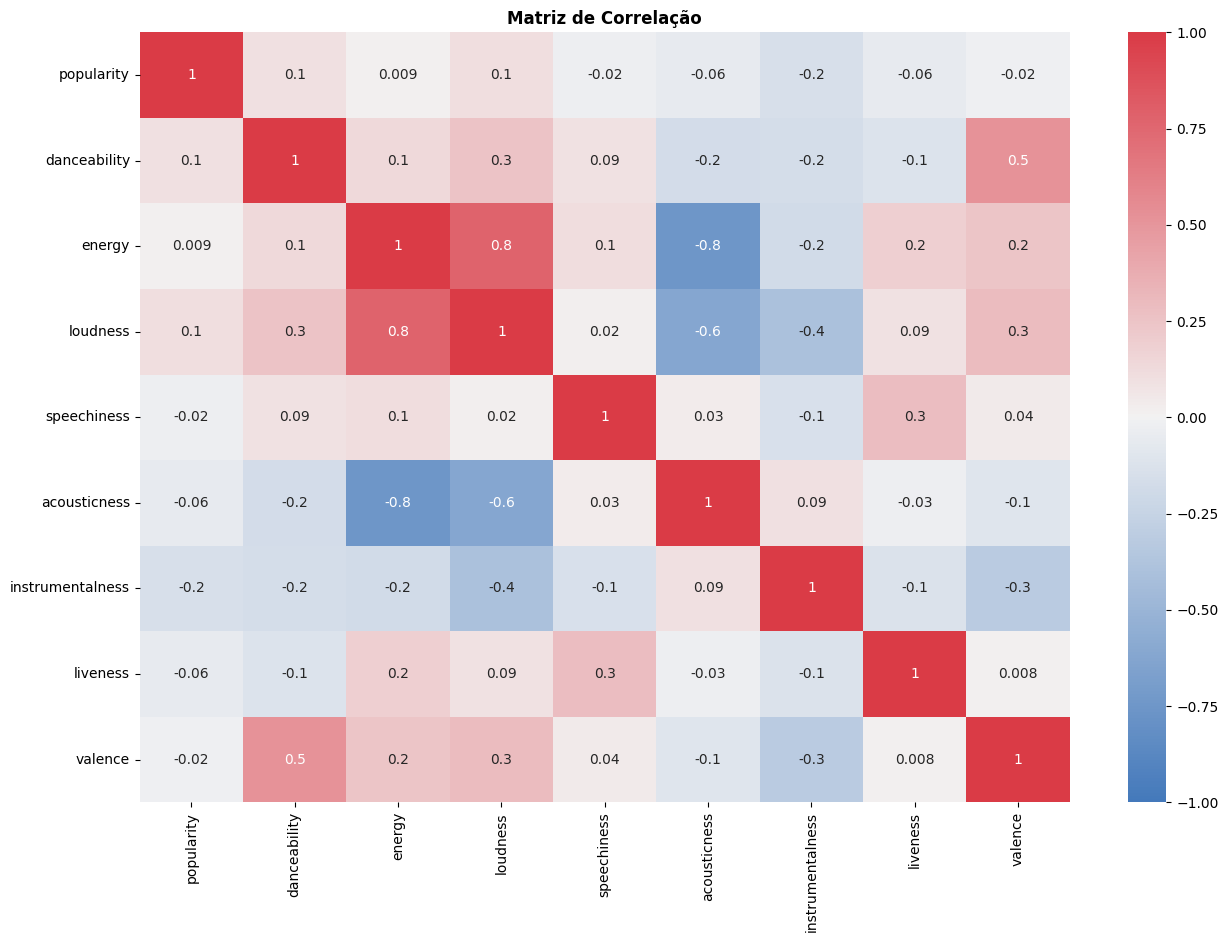

In [ ]:
spotify_df_with_sound_characteristics_and_popularity = spotify_raw_df[["popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]

spotify_correlation_matrix = spotify_df_with_sound_characteristics_and_popularity.corr()

cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(15, 10))
sns.heatmap(spotify_correlation_matrix, annot=True, fmt=".1g", vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Matriz de Correlação", fontweight="bold", fontsize="large")

Estruturação dos Dados de Treino/Teste

In [ ]:
spotfy_cleaned_df = spotify_df_with_sound_characteristics_and_popularity.query("popularity > 0").copy()
spotfy_cleaned_df["is_popular"] = spotfy_cleaned_df["popularity"].apply(lambda x: 1 if x >= 80 else 0)

X = spotfy_cleaned_df.drop(columns=["popularity", "is_popular"])
y = spotfy_cleaned_df["is_popular"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)

Modelo de Regressão Linear

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_test, y_pred)}")

Erro Quadrático Médio (MSE): 0.0004888525050259753
Erro Médio Absoluto (MAE): 0.0010915011585790203
Coeficiente de Determinação (R²): 0.0004826174212817502


Modelo de Regressão Logística

In [ ]:
model = LogisticRegression(solver = "lbfgs", max_iter = 1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_test, y_pred)}")

Erro Quadrático Médio (MSE): 0.0004893279895610029
Erro Médio Absoluto (MAE): 0.0004893279895610029
Coeficiente de Determinação (R²): -0.0004895675486658035


Previsão

In [ ]:
predicted_track_characteristics = {
  "danceability": 0.707,
  "energy": 0.681,
  "loudness": -4.325,
  "speechiness": 0.0668,
  "acousticness": 0.0632,
  "instrumentalness": 0.0,
  "liveness": 0.0322,
  "valence": 0.646
}

predicted_track_df = pd.DataFrame([predicted_track_characteristics])

predicted_track_is_popular = model.predict(predicted_track_df)[0]

if predicted_track_is_popular == 1:
    print(f"O modelo prevê que a música com as características sonoras fornecidas será POPULAR.")
else:
    print(f"O modelo prevê que a música com as características sonoras fornecidas NÃO será popular.")

O modelo prevê que a música com as características sonoras fornecidas NÃO será popular.


##### Gênero x Popularidade

Preparação dos Dados

In [ ]:
spotify_df_with_genre_and_popularity = spotify_raw_df[["track_name", "popularity", "genre"]]

one_hot_encoded_genres = pd.get_dummies(spotify_df_with_genre_and_popularity["genre"])

spotify_df_with_encoding = pd.concat([spotify_df_with_genre_and_popularity, one_hot_encoded_genres], axis=1)

spotify_df_with_encoding = spotify_df_with_encoding.groupby("track_name").agg({
    **{col: "sum" for col in one_hot_encoded_genres.columns},
    "popularity": "first"
}).reset_index()

spotify_df_with_encoding.head()

,track_name,acoustic,afrobeat,alt-rock,ambient,black-metal,blues,breakbeat,cantopop,chicago-house,...,sleep,songwriter,soul,spanish,swedish,tango,techno,trance,trip-hop,popularity
0,!,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
1,!!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
2,!!Noble Stabbings!!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
3,!?!,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17
4,!@*$%#,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


Estruturação dos Dados de Treino/Teste

In [ ]:
spotfy_cleaned_df = spotify_df_with_encoding.query("popularity > 0").copy()
spotfy_cleaned_df["is_popular"] = spotfy_cleaned_df["popularity"].apply(lambda x: 1 if x >= 80 else 0)

X = spotfy_cleaned_df.drop(columns=["popularity", "is_popular", "track_name"])
y = spotfy_cleaned_df["is_popular"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)

Modelo de Regressão Linear

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Erro Quadrático Médio (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"Coeficiente de Determinação (R²): {r2_score(y_test, y_pred)}")

Erro Quadrático Médio (MSE): 0.0004091536344974067
Erro Médio Absoluto (MAE): 0.0009210067867076448
Coeficiente de Determinação (R²): 0.004924994024222085


Previsão

In [ ]:
predicted_track_genre = "pop"

predicted_track_vector = {col: 0 for col in X.columns}
predicted_track_vector[predicted_track_genre] = 1

predicted_track_df = pd.DataFrame([predicted_track_vector])

predicted_track_is_popular = model.predict(predicted_track_df)[0]

if predicted_track_is_popular > 0.001:
    print(f"O modelo prevê que a música com o gênero fornecido será POPULAR.")
else:
    print(f"O modelo prevê que a música com o gênero fornecido NÃO será popular.")

O modelo prevê que a música com o gênero fornecido será POPULAR.


### Pergunta 4: Quais gêneros/subgêneros musicais estão mais ligados a certos tipos de descritores?

#### I. Visualização dos Dados

In [ ]:
from IPython.display import display

# Preencher valores nulos em gêneros
sanitized_rym_df['primary_genres'] = sanitized_rym_df['primary_genres'].fillna('')
sanitized_rym_df['secondary_genres'] = sanitized_rym_df['secondary_genres'].fillna('')

# Combinar gêneros sem gerar NaN
sanitized_rym_df['combined_genres'] = sanitized_rym_df['primary_genres'].str.cat(
    sanitized_rym_df['secondary_genres'], sep=', ', na_rep='')

# Preencher nulos em descriptors
sanitized_rym_df['descriptors'] = sanitized_rym_df['descriptors'].fillna('')

# Explodir descriptors, removendo valores em branco
exploded_descriptors = sanitized_rym_df.assign(
    descriptor=sanitized_rym_df['descriptors']
    .str.split(', ')
    .apply(lambda x: [d.strip() for d in x if d.strip() != ''])  # Remove descritores vazios
).explode('descriptor').dropna(subset=['descriptor'])

# Explodir gêneros, removendo valores em branco
exploded_genres = exploded_descriptors.assign(
    genre=exploded_descriptors['combined_genres']
    .str.split(', ')
    .apply(lambda x: [g.strip() for g in x if g.strip() != ''])  # Remove gêneros vazios
).explode('genre').dropna(subset=['genre'])

# Contar descritores por gênero
genre_descriptor_counts = exploded_genres.groupby(
    ['genre', 'descriptor']
)['descriptor'].count().reset_index(name='count')

# Top 5 gêneros por descritor
top_5_genres_per_descriptor = genre_descriptor_counts.groupby('descriptor').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

# Filtrar linhas com descritores não vazios
table = top_5_genres_per_descriptor[top_5_genres_per_descriptor['descriptor'] != '']

# Exibir tabela final
display(table)

<ipython-input-55-66e008f97a6f>:34: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_genres_per_descriptor = genre_descriptor_counts.groupby('descriptor').apply(


,genre,descriptor,count
0,Singer-Songwriter,Christian,8
1,Conscious Hip Hop,Christian,6
2,Indie Folk,Christian,5
3,Americana,Christian,4
4,Avant-Folk,Christian,4
...,...,...,...
891,Post-Rock,winter,17
892,Black Metal,winter,16
893,Art Pop,winter,15
894,Ambient,winter,14


### extra) Quais gêneros (ou subgêneros) aparecem mais vezes entre os álbuns mais bem avaliados?

#### I. Visualização dos Dados

O valor do percentil 90 de avg_rating é: 3.88


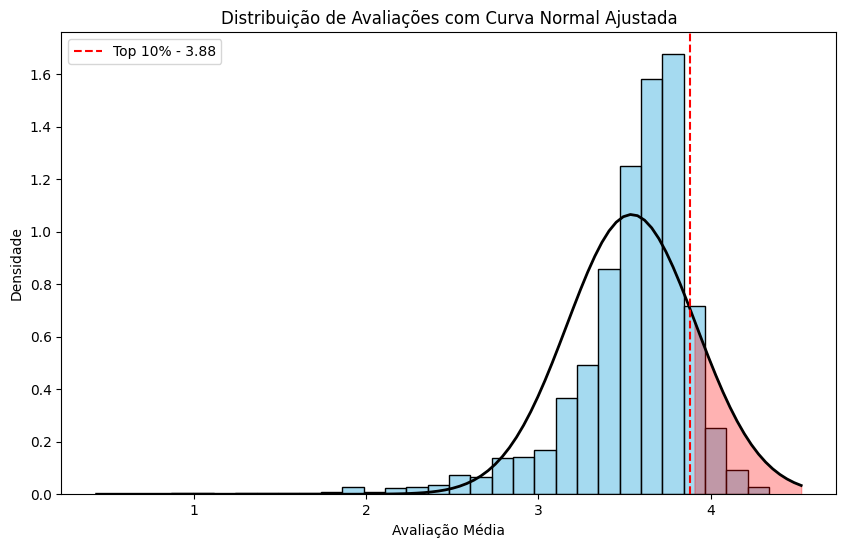

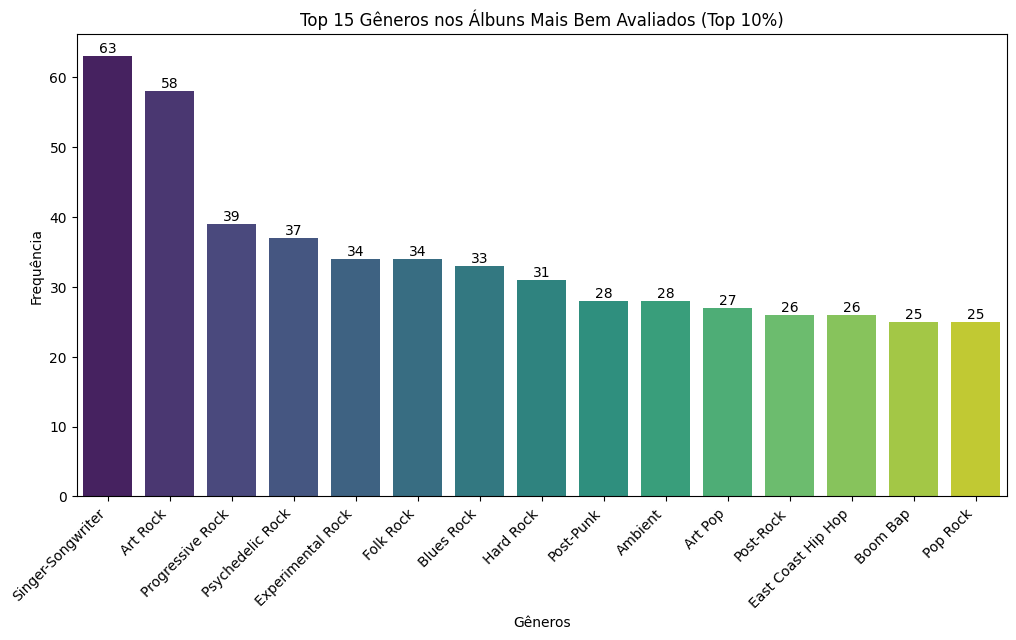

In [ ]:
# Calcula o percentil 90 para o avg_rating (top 10%)
threshold = sanitized_rym_df['avg_rating'].quantile(0.90)
print(f'O valor do percentil 90 de avg_rating é: {threshold}')

plt.figure(figsize=(10, 6))

# Histograma de avg_rating
sns.histplot(sanitized_rym_df['avg_rating'], kde=False, bins=30, color='skyblue', stat='density')

# Ajuste da curva normal
mu, std = norm.fit(sanitized_rym_df['avg_rating'].dropna())  # Calcula a média e o desvio padrão
xmin, xmax = plt.xlim()  # Definir os limites do eixo X
x = np.linspace(xmin, xmax, 100)  # Geração de pontos para a curva normal
p = norm.pdf(x, mu, std)  # Distribuição normal com média e desvio padrão
plt.plot(x, p, 'k', linewidth=2)
plt.axvline(threshold, color='r', linestyle='--', label=f'Top 10% - {threshold:.2f}')
plt.fill_between(x, p, where=(x >= threshold), color='red', alpha=0.3)
plt.title('Distribuição de Avaliações com Curva Normal Ajustada')
plt.xlabel('Avaliação Média')
plt.ylabel('Densidade')
plt.legend()
plt.show()

# Filtra os álbuns acima do percentil 90
top_albums = sanitized_rym_df[sanitized_rym_df['avg_rating'] >= threshold].copy()

# Combina gêneros primários e secundários
top_albums['combined_genres'] = top_albums['primary_genres'].fillna('') + ', ' + top_albums['secondary_genres'].fillna('')
top_albums['combined_genres'] = top_albums['combined_genres'].apply(lambda x: [genre.strip() for genre in x.split(', ') if genre.strip() != ''])
exploded_genres = top_albums.explode('combined_genres')

genre_counts = exploded_genres['combined_genres'].value_counts()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15], hue=genre_counts.index[:15], palette="viridis")

for i, value in enumerate(genre_counts.values[:15]):
    ax.text(i, value + 0.05, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Gêneros")
plt.ylabel("Frequência")
plt.title("Top 15 Gêneros nos Álbuns Mais Bem Avaliados (Top 10%)")
plt.show()

O valor do percentil 90 de avg_rating é: 3.88


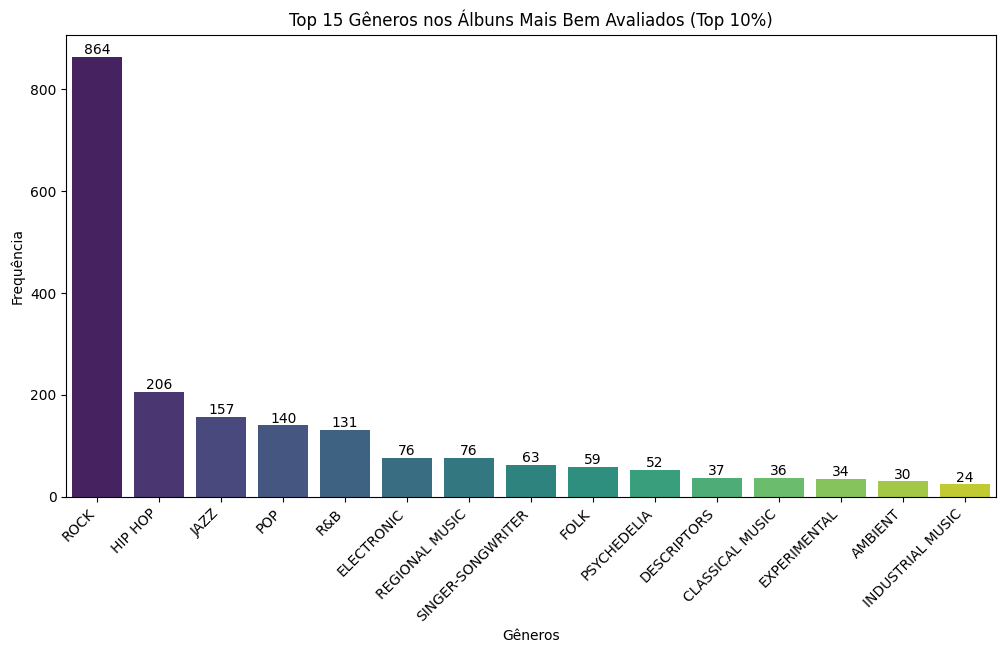

In [ ]:
# Função para carregar e mapear subgêneros para gêneros
def load_genre_mapping(csv_path):
    genre_df = pd.read_csv(csv_path)
    genre_mapping = dict(zip(genre_df['Subgenre'], genre_df['Genre']))
    return genre_mapping

# Carregar o mapeamento de gêneros e subgêneros
genre_mapping = load_genre_mapping(mapped_rym_genres_and_subgenres_file_path)

# Função para mapear subgêneros
def map_to_primary_genre(genres_column, genre_mapping):
    mapped_genres = genres_column.apply(lambda x: [genre_mapping.get(subgenre, subgenre) for subgenre in x])
    return mapped_genres

# Combina gêneros primários e secundários
top_albums['combined_genres'] = top_albums['primary_genres'].fillna('') + ', ' + top_albums['secondary_genres'].fillna('')
top_albums['combined_genres'] = top_albums['combined_genres'].apply(lambda x: [genre.strip() for genre in x.split(', ') if genre.strip() != ''])

# Mapear para os gêneros principais
top_albums['combined_genres'] = top_albums['combined_genres'].apply(lambda x: [genre_mapping.get(genre, genre) for genre in x])

# Agora padronizamos os gêneros para caixa alta
top_albums['combined_genres'] = top_albums['combined_genres'].apply(lambda x: [genre.upper() for genre in x])

# Explodir para ter uma linha para cada gênero
exploded_genres = top_albums.explode('combined_genres')

# Contagem de frequência de gêneros
genre_counts = exploded_genres['combined_genres'].value_counts()

# Mostrar o percentil 90 para a análise do avg_rating
threshold = sanitized_rym_df['avg_rating'].quantile(0.90)
print(f'O valor do percentil 90 de avg_rating é: {threshold}')

# Filtrar os álbuns no top 10%
top_albums = sanitized_rym_df[sanitized_rym_df['avg_rating'] >= threshold].copy()

# Plotando os 15 gêneros mais frequentes
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_counts.index[:15], y=genre_counts.values[:15], hue=genre_counts.index[:15], palette="viridis")

for i, value in enumerate(genre_counts.values[:15]):
    ax.text(i, value + 0.05, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Gêneros")
plt.ylabel("Frequência")
plt.title("Top 15 Gêneros nos Álbuns Mais Bem Avaliados (Top 10%)")
plt.show()


### extra) Teste de Hipótese com descritor "*noisy*".

#### II. Análise dos Dados

**H0 (Hipótese Nula):** A média das avaliações dos álbuns com o descritor "noisy" é maior ou igual à média geral das avaliações.

**H1 (Hipótese Alternativa):** A média das avaliações dos álbuns com o descritor "noisy" é menor que a média geral das avaliações.

In [ ]:
# Média geral das avaliações, excluindo os álbuns com o descritor "noisy"
mean_overall_no_noisy = sanitized_rym_df[~sanitized_rym_df['descriptors'].str.contains('noisy', na=False)]['avg_rating'].mean()

# Média geral das avaliações, incluindo os álbuns com o descritor "noisy"
mean_overall_with_noisy = sanitized_rym_df['avg_rating'].mean()

# Álbuns com o descritor "noisy"
noisy_ratings = sanitized_rym_df[sanitized_rym_df['descriptors'].str.contains('noisy', na=False)]['avg_rating']

# Teste t para os álbuns "noisy" vs média geral sem "noisy" (H1: média menor)
t_stat_no_noisy, p_value_no_noisy = stats.ttest_1samp(noisy_ratings, mean_overall_no_noisy)

# Teste t para os álbuns "noisy" vs média geral com "noisy" (H1: média menor)
t_stat_with_noisy, p_value_with_noisy = stats.ttest_1samp(noisy_ratings, mean_overall_with_noisy)

# Exibir resultados para análise sem "noisy"
print("Análise com média geral sem os álbuns 'noisy':")
print(f'Estatística t: {t_stat_no_noisy:.4f}, p-valor unilateral: {p_value_no_noisy/2:.4f}')  # Dividir p-valor por 2 para teste unilateral
print(f'Média geral sem "noisy": {mean_overall_no_noisy:.4f}, Média "noisy": {noisy_ratings.mean():.4f}')

if p_value_no_noisy / 2 < 0.05 and noisy_ratings.mean() < mean_overall_no_noisy:
    print('Rejeitamos H0: A avaliação média de álbuns com "noisy" é significativamente menor que a média geral (sem "noisy").')
else:
    print('Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "noisy" seja menor que a média geral (sem "noisy").')

# Exibir resultados para análise com "noisy"
print("\nAnálise com média geral incluindo os álbuns 'noisy':")
print(f'Estatística t: {t_stat_with_noisy:.4f}, p-valor unilateral: {p_value_with_noisy/2:.4f}')  # Dividir p-valor por 2 para teste unilateral
print(f'Média geral com "noisy": {mean_overall_with_noisy:.4f}, Média "noisy": {noisy_ratings.mean():.4f}')

if p_value_with_noisy / 2 < 0.05 and noisy_ratings.mean() < mean_overall_with_noisy:
    print('Rejeitamos H0: A avaliação média de álbuns com "noisy" é significativamente menor que a média geral (com "noisy").')
else:
    print('Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "noisy" seja menor que a média geral (com "noisy").')

# Intervalo de Confiança 95% para os álbuns "noisy"
mean_noisy = np.mean(noisy_ratings)
std_err_noisy = stats.sem(noisy_ratings)  # Erro padrão da média
ic_95_noisy = stats.t.interval(0.95, len(noisy_ratings)-1, loc=mean_noisy, scale=std_err_noisy)

# Exibir os resultados
print(f'\nMédia dos álbuns "noisy": {mean_noisy:.4f}')
print(f'Intervalo de Confiança 95% para a média: {ic_95_noisy}')

# Função Bootstrap para intervalo de confiança
def bootstrap_confidence_interval(data, n_iterations=10000, confidence_level=0.95):
    """Calcula o intervalo de confiança para a média utilizando o Bootstrap"""
    boot_means = []
    n = len(data)

    for i in range(n_iterations):
        sample = np.random.choice(data, size=n, replace=True)
        boot_means.append(np.mean(sample))

    lower_percentile = ((1 - confidence_level) / 2) * 100
    upper_percentile = (1 - (1 - confidence_level) / 2) * 100
    lower_bound = np.percentile(boot_means, lower_percentile)
    upper_bound = np.percentile(boot_means, upper_percentile)

    return lower_bound, upper_bound

# Calcular o intervalo de confiança usando Bootstrap
ic_95_bootstrap_noisy = bootstrap_confidence_interval(noisy_ratings.values)

# Exibir os resultados
print(f'Intervalo de confiança 95% (Bootstrap) para "noisy": {ic_95_bootstrap_noisy}')


Análise com média geral sem os álbuns 'noisy':
Estatística t: 2.0098, p-valor unilateral: 0.0225
Média geral sem "noisy": 3.5382, Média "noisy": 3.5620
Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "noisy" seja menor que a média geral (sem "noisy").

Análise com média geral incluindo os álbuns 'noisy':
Estatística t: 1.8237, p-valor unilateral: 0.0344
Média geral com "noisy": 3.5404, Média "noisy": 3.5620
Não rejeitamos H0: Não há evidências de que a avaliação média dos álbuns "noisy" seja menor que a média geral (com "noisy").

Média dos álbuns "noisy": 3.5620
Intervalo de Confiança 95% para a média: (3.5387521699618034, 3.5852219121116313)
Intervalo de confiança 95% (Bootstrap) para "noisy": (3.53829373650108, 3.5850329373650105)


# Conclusões


Com base nos outputs e análises realizadas, podemos concluir que existe uma relação entre as características sonoras de um álbum e sua popularidade (medida pela avaliação média).

Alguns descritores sonoros específicos dentro de cada categoria parecem influenciar positivamente as avaliações dos álbuns, como "martial" em atmosfera, "symphony" em forma, "meditative" em humor e "technical" em estilo. Álbuns com estes descritores tendem a receber avaliações médias mais altas.

Além disso, observa-se uma possível correlação entre a popularidade de uma música e seu gênero, já que estilos como "pop", "hip-hop" e "dance" tendem a ser mais prevalentes em músicas de maior popularidade.

A análise exploratória de dados e os testes de hipóteses realizados confirmaram a existência de diferenças significativas nas médias de avaliações de álbuns com e sem determinados descritores, assim como variações nas avaliações de álbuns conforme seu gênero principal.

Ademais, a observação dos gêneros mais bem avaliados (top 10%) no dataset dos 5.000 álbuns mais populares do RYM, com base na quantidade de avaliações, revelou um domínio expressivo do Rock. Esse resultado, embora esperado por muitos, se torna ainda mais interessante quando aprofundamos a análise nos subgêneros mais recorrentes. Dentre os 15 mais frequentes, é possível destacar alguns como Art Rock, Post-Punk, Ambient, Art Pop e East Coast Hip-Hop, além de diversos outros subgêneros fortemente ligados ao Rock, muitos deles compartilhando até mesmo o sufixo ("Progressive Rock", "Psychedelic Rock" etc).

A modelagem preditiva permitiu estimar a avaliação média de um álbum com base em um conjunto de descritores. Por exemplo, um álbum com as características "humorous", "sampling", "conscious", "playful", "malevocals", "passionate", "boastful", "satirical", "sarcastic" e "warm" obteve uma previsão de avaliação média de `3,93`. No entanto, com um `R²=0,25`, o modelo indica que os descritores utilizados não explicam adequadamente as variações nas avaliações, sugerindo a necessidade de melhorias. Para isso, é necessário explorar técnicas de engenharia de atributos, além de ajustar e refinar os parâmetros do modelo para aprimorar sua precisão.

Por fim, foi elaborada uma segunda modelagem preditiva com o objetivo de estimar a popularidade de uma música com base em suas características sonoras. Contudo, o modelo apresentou um `R² = 0`, indicando que os parâmetros utilizados não explicam a popularidade musical. Dessa forma, é necessário um trabalho mais aprofundado de engenharia de atributos para aprimorar a precisão das previsões.